<a href="https://colab.research.google.com/github/joeljacson/machine-learning/blob/main/Chennai_Water1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Chennai_Reservoir_Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())



   Year  Reservoir Level (%)  Reservoir Storage (TMCFT)  \
0  1980                 62.0                       8.18   
1  1990                 55.0                       7.30   
2  2000                 48.0                       6.35   
3  2010                 52.0                       6.87   
4  2020                 75.0                       9.90   

   Impact of Recent Monsoons (%)  Desalination Efforts (MLD)  \
0                          85.00                          60   
1                          78.00                          80   
2                          70.00                         100   
3                          72.00                         100   
4                          87.75                         126   

   Historical Comparisons (%)  
0                        45.0  
1                        50.0  
2                        48.0  
3                        60.0  
4                        75.0  


In [ ]:
# Basic information and statistics
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           8 non-null      object 
 1   Reservoir Level (%)            8 non-null      float64
 2   Reservoir Storage (TMCFT)      8 non-null      float64
 3   Impact of Recent Monsoons (%)  8 non-null      float64
 4   Desalination Efforts (MLD)     8 non-null      int64  
 5   Historical Comparisons (%)     8 non-null      float64
dtypes: float64(4), int64(1), object(1)
memory usage: 512.0+ bytes
None
       Reservoir Level (%)  Reservoir Storage (TMCFT)  \
count              8.00000                   8.000000   
mean              57.23125                   7.567500   
std                8.67175                   1.139358   
min               48.00000                   6.350000   
25%               51.50000                   6.802500   
50%   

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values if needed
data = data.dropna()  # Example: Dropping rows with missing values


Year                             0
Reservoir Level (%)              0
Reservoir Storage (TMCFT)        0
Impact of Recent Monsoons (%)    0
Desalination Efforts (MLD)       0
Historical Comparisons (%)       0
dtype: int64


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Chennai_Reservoir_Data.csv'
data = pd.read_csv(file_path)

# Inspect the data types
print(data.dtypes)


Year                              object
Reservoir Level (%)              float64
Reservoir Storage (TMCFT)        float64
Impact of Recent Monsoons (%)    float64
Desalination Efforts (MLD)         int64
Historical Comparisons (%)       float64
dtype: object


In [ ]:
# Convert columns to appropriate data types
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Desalination Efforts (MLD)'] = pd.to_numeric(data['Desalination Efforts (MLD)'], errors='coerce')
data['Reservoir Level (%)'] = pd.to_numeric(data['Reservoir Level (%)'], errors='coerce')

# Check for missing values after conversion
print(data.isnull().sum())


Year                             2
Reservoir Level (%)              0
Reservoir Storage (TMCFT)        0
Impact of Recent Monsoons (%)    0
Desalination Efforts (MLD)       0
Historical Comparisons (%)       0
dtype: int64


In [ ]:
# Drop rows with missing values or fill them
data = data.dropna()  # Example: Dropping rows with missing values

# Alternatively, fill missing values if appropriate
# data.fillna(method='ffill', inplace=True)  # Forward fill example


In [ ]:
# Create a feature for the difference in years
data['Year_Diff'] = data['Year'] - data['Year'].min()

# Prepare features and target variable
X = data[['Year_Diff', 'Desalination Efforts (MLD)']]
y = data['Reservoir Level (%)']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Predict future water levels
future_years = pd.DataFrame({
    'Year_Diff': [2030 - data['Year'].min(), 2040 - data['Year'].min()],
    'Desalination Efforts (MLD)': [130, 140]
})

future_predictions = model.predict(future_years)
print(f'Predicted Water Levels for 2030 and 2040: {future_predictions}')


Mean Squared Error: 961.0854147024877
Predicted Water Levels for 2030 and 2040: [69.91213528 76.31100796]


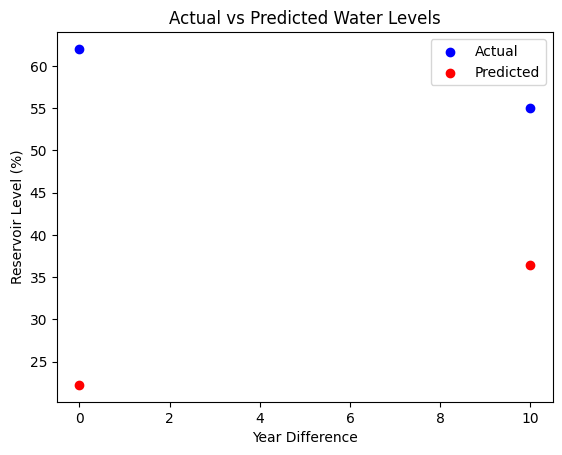

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted water levels
plt.scatter(X_test['Year_Diff'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Year_Diff'], y_pred, color='red', label='Predicted')
plt.xlabel('Year Difference')
plt.ylabel('Reservoir Level (%)')
plt.legend()
plt.title('Actual vs Predicted Water Levels')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Chennai_Reservoir_Data.csv'
data = pd.read_csv(file_path)

# Inspect the data
print(data.head())
print(data.dtypes)


   Year  Reservoir Level (%)  Reservoir Storage (TMCFT)  \
0  1980                 62.0                       8.18   
1  1990                 55.0                       7.30   
2  2000                 48.0                       6.35   
3  2010                 52.0                       6.87   
4  2020                 75.0                       9.90   

   Impact of Recent Monsoons (%)  Desalination Efforts (MLD)  \
0                          85.00                          60   
1                          78.00                          80   
2                          70.00                         100   
3                          72.00                         100   
4                          87.75                         126   

   Historical Comparisons (%)  
0                        45.0  
1                        50.0  
2                        48.0  
3                        60.0  
4                        75.0  
Year                              object
Reservoir Level (%)        

In [ ]:
# Print the columns of the DataFrame
print(data.columns)


Index(['Year', 'Reservoir Level (%)', 'Reservoir Storage (TMCFT)',
       'Impact of Recent Monsoons (%)', 'Desalination Efforts (MLD)',
       'Historical Comparisons (%)'],
      dtype='object')


In [ ]:
# Ensure 'Year' column is in numeric format
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Create the 'Year_Diff' column
data['Year_Diff'] = data['Year'] - data['Year'].min()

# Verify the new column
print(data[['Year', 'Year_Diff']].head())


     Year  Year_Diff
0  1980.0        0.0
1  1990.0       10.0
2  2000.0       20.0
3  2010.0       30.0
4  2020.0       40.0


In [ ]:
# Print the first few rows and column names to verify
print(data.head())
print(data.columns)


     Year  Reservoir Level (%)  Reservoir Storage (TMCFT)  \
0  1980.0                 62.0                       8.18   
1  1990.0                 55.0                       7.30   
2  2000.0                 48.0                       6.35   
3  2010.0                 52.0                       6.87   
4  2020.0                 75.0                       9.90   

   Impact of Recent Monsoons (%)  Desalination Efforts (MLD)  \
0                          85.00                          60   
1                          78.00                          80   
2                          70.00                         100   
3                          72.00                         100   
4                          87.75                         126   

   Historical Comparisons (%)  Year_Diff  
0                        45.0        0.0  
1                        50.0       10.0  
2                        48.0       20.0  
3                        60.0       30.0  
4                        75.0    

In [ ]:
# Check for missing values in features and target variable
print(X.isnull().sum())
print(y.isnull().sum())


Year_Diff                     2
Desalination Efforts (MLD)    0
dtype: int64
0


In [ ]:
# Drop rows with missing values in features and target variable
data = data.dropna(subset=['Year_Diff', 'Desalination Efforts (MLD)', 'Reservoir Level (%)'])


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values for features
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Impute missing values for target variable if necessary
y = y.fillna(y.mean())


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values for features
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Impute missing values for target variable if necessary
y = y.fillna(y.mean())


In [ ]:
# Check again for missing values
print(pd.DataFrame(X).isnull().sum())
print(pd.Series(y).isnull().sum())


0    0
1    0
dtype: int64
0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

print(f'Linear Regression MSE: {lr_mse}')
print(f'Random Forest MSE: {rf_mse}')


Linear Regression MSE: 6.820961242465634
Random Forest MSE: 20.87104999999996


In [ ]:
# Print predictions and compare with actual values
print(f'Linear Regression Predictions: {lr_pred[:5]}')
print(f'Actual Values: {y_test.values[:5]}')

print(f'Random Forest Predictions: {rf_pred[:5]}')


Linear Regression Predictions: [55.93210289 64.42394833]
Actual Values: [55.   60.85]
Random Forest Predictions: [58.39 66.35]


#Plotting Reservoir Levels Over Time

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


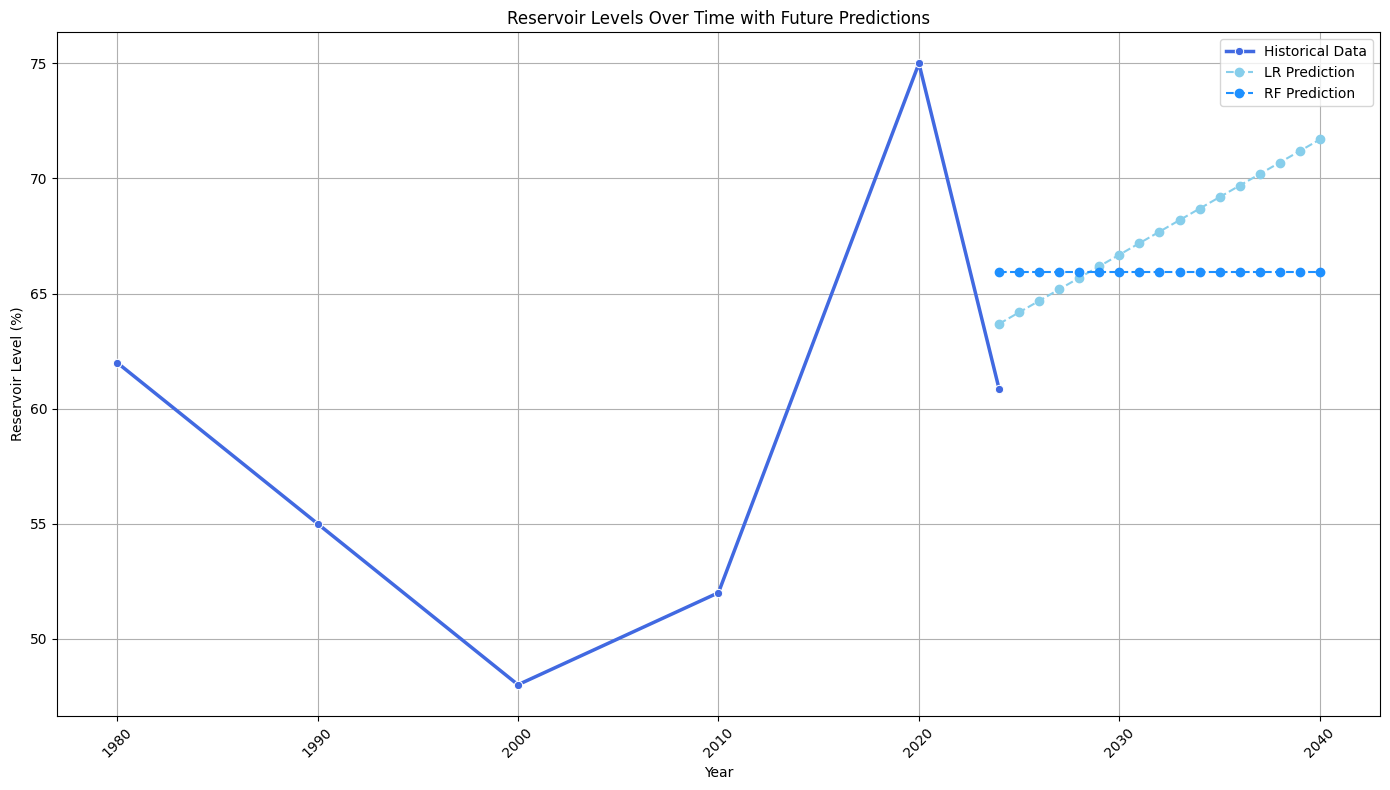

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Assuming data is your original DataFrame and it includes 'Year_Diff' and 'Desalination Efforts (MLD)'

# Create a DataFrame for future years
future_years = pd.DataFrame({
    'Year': np.arange(2024, 2041),
    'Desalination Efforts (MLD)': [130] * 17  # Example constant value; adjust if needed
})

# Create 'Year_Diff' for future years
year_min = data['Year'].min()
future_years['Year_Diff'] = future_years['Year'] - year_min

# Impute missing values if necessary (using mean values from the existing data)
# Impute only if there are NaN values
future_years.fillna({
    'Desalination Efforts (MLD)': data['Desalination Efforts (MLD)'].mean()
}, inplace=True)

# Prepare features for prediction
future_X = future_years[['Year_Diff', 'Desalination Efforts (MLD)']]

# Use your trained models to predict future reservoir levels
# Ensure lr_model and rf_model are trained models
future_reservoir_lr = lr_model.predict(future_X)
future_reservoir_rf = rf_model.predict(future_X)

# Plotting historical and future data
plt.figure(figsize=(14, 8))

# Plot historical data
sns.lineplot(x='Year', y='Reservoir Level (%)', data=data, color='royalblue', marker='o', linewidth=2.5, label='Historical Data')

# Plot future predictions (Linear Regression)
plt.plot(future_years['Year'], future_reservoir_lr, color='skyblue', linestyle='--', marker='o', label='LR Prediction')

# Plot future predictions (Random Forest)
plt.plot(future_years['Year'], future_reservoir_rf, color='dodgerblue', linestyle='--', marker='o', label='RF Prediction')

plt.title('Reservoir Levels Over Time with Future Predictions')
plt.xlabel('Year')
plt.ylabel('Reservoir Level (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate Linear Regression Model
lr_mse = mean_squared_error(y_test, lr_model.predict(X_test))
lr_r2 = r2_score(y_test, lr_model.predict(X_test))

# Evaluate Random Forest Model
rf_mse = mean_squared_error(y_test, rf_model.predict(X_test))
rf_r2 = r2_score(y_test, rf_model.predict(X_test))

print(f'Linear Regression MSE: {lr_mse}')
print(f'Linear Regression R^2: {lr_r2}')
print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest R^2: {rf_r2}')


Linear Regression MSE: 6.820961242465634
Linear Regression R^2: 0.20275126101650898
Random Forest MSE: 20.87104999999996
Random Forest R^2: -1.4394535758638263


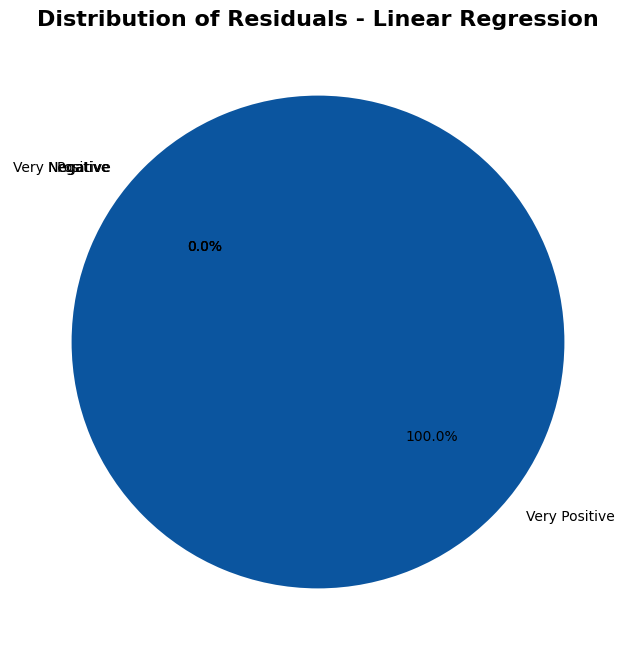

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define bins for residual categories
bins = [-np.inf, -0.5, 0, 0.5, np.inf]  # Adjust bin edges based on your residuals distribution
labels = ['Very Negative', 'Negative', 'Positive', 'Very Positive']

# Categorize residuals
residuals_categories = pd.cut(residuals, bins=bins, labels=labels)

# Calculate proportions for each category
proportions = residuals_categories.value_counts(normalize=True)

# Plot Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', colors=sns.color_palette('Blues_r'), startangle=140)
plt.title('Distribution of Residuals - Linear Regression', fontsize=16, fontweight='bold')
plt.show()


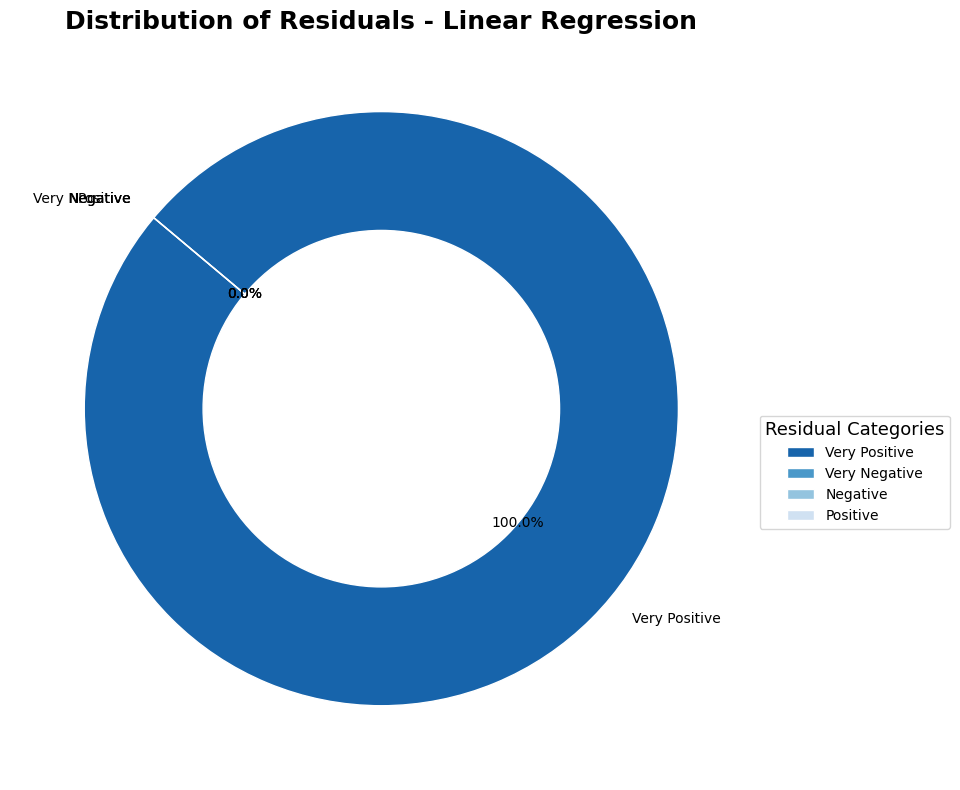

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define bins for residual categories
bins = [-np.inf, -0.5, 0, 0.5, np.inf]  # Adjust bin edges based on your residuals distribution
labels = ['Very Negative', 'Negative', 'Positive', 'Very Positive']

# Categorize residuals
residuals_categories = pd.cut(residuals, bins=bins, labels=labels)

# Calculate proportions for each category
proportions = residuals_categories.value_counts(normalize=True)

# Define colors for the pie chart
colors = sns.color_palette('Blues_r', n_colors=len(labels))

# Plot Pie Chart
plt.figure(figsize=(12, 8))
plt.pie(proportions,
        labels=proportions.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=140,
        wedgeprops=dict(width=0.4, edgecolor='w'))  # Add a border to each wedge

# Add title
plt.title('Distribution of Residuals - Linear Regression', fontsize=18, fontweight='bold')

# Add a legend
plt.legend(title='Residual Categories', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Create a DataFrame for future years
future_years = pd.DataFrame({
    'Year': np.arange(2024, 2041),
    'Desalination Efforts (MLD)': [130] * 17  # Example constant value; adjust if needed
})

# Create 'Year_Diff' for future years
year_min = data['Year'].min()
future_years['Year_Diff'] = future_years['Year'] - year_min

# Prepare features for prediction
future_X = future_years[['Year_Diff', 'Desalination Efforts (MLD)']]

# Predict reservoir levels using the Linear Regression model
future_reservoir_lr = lr_model.predict(future_X)

# Predict reservoir levels using the Random Forest model
future_reservoir_rf = rf_model.predict(future_X)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


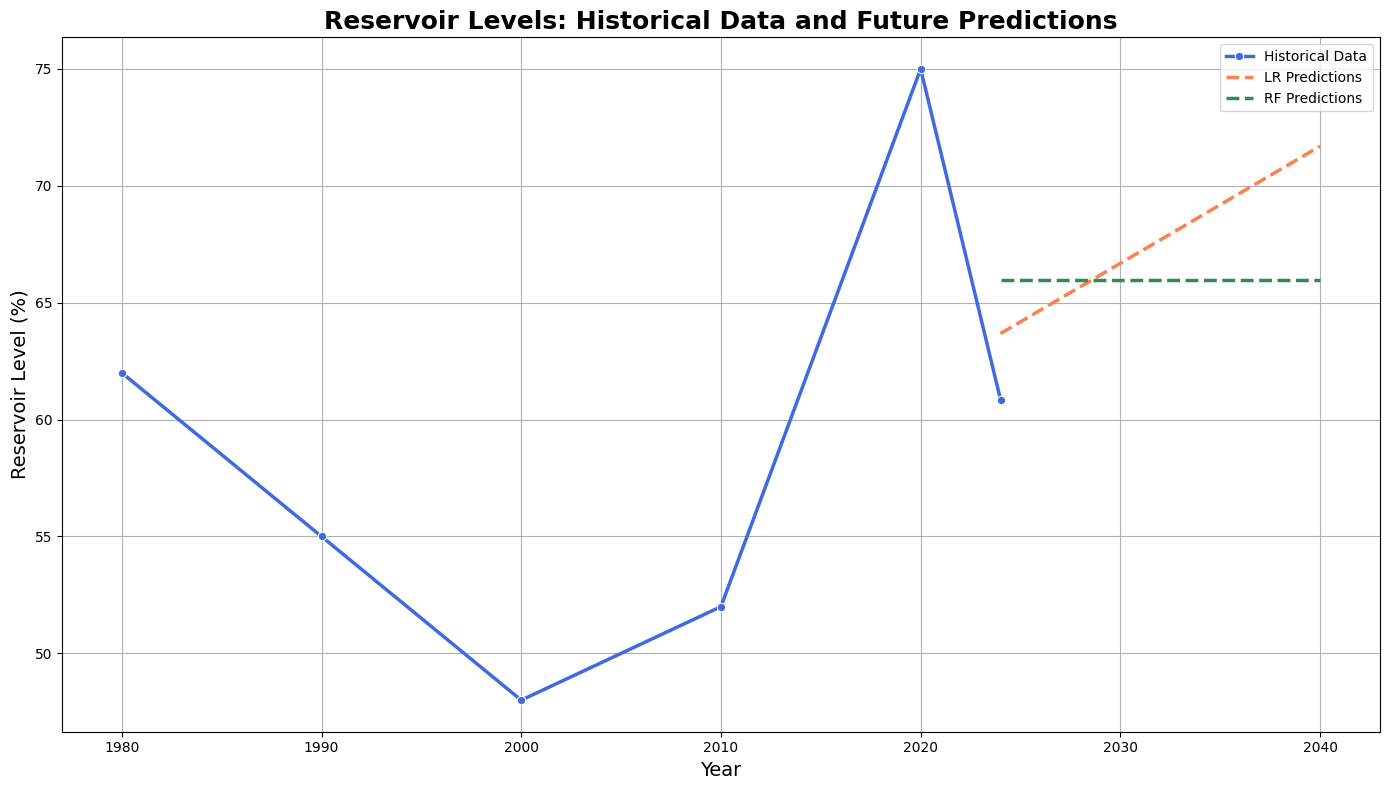

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine historical and future data for plotting
historical_data = data[['Year', 'Reservoir Level (%)']]
future_data_lr = future_years.copy()
future_data_lr['Reservoir Level (%)'] = future_reservoir_lr

future_data_rf = future_years.copy()
future_data_rf['Reservoir Level (%)'] = future_reservoir_rf

# Plot Historical and Predicted Data
plt.figure(figsize=(14, 8))

# Plot Historical Data
sns.lineplot(x='Year', y='Reservoir Level (%)', data=historical_data, color='royalblue', marker='o', linewidth=2.5, label='Historical Data')

# Plot Future Predictions from Linear Regression
sns.lineplot(x='Year', y='Reservoir Level (%)', data=future_data_lr, color='coral', linestyle='--', linewidth=2.5, label='LR Predictions')

# Plot Future Predictions from Random Forest
sns.lineplot(x='Year', y='Reservoir Level (%)', data=future_data_rf, color='seagreen', linestyle='--', linewidth=2.5, label='RF Predictions')

plt.title('Reservoir Levels: Historical Data and Future Predictions', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Reservoir Level (%)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


<ipython-input-34-9636ae6bdd27>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Error', data=future_data_lr, palette='coolwarm', edgecolor='black')


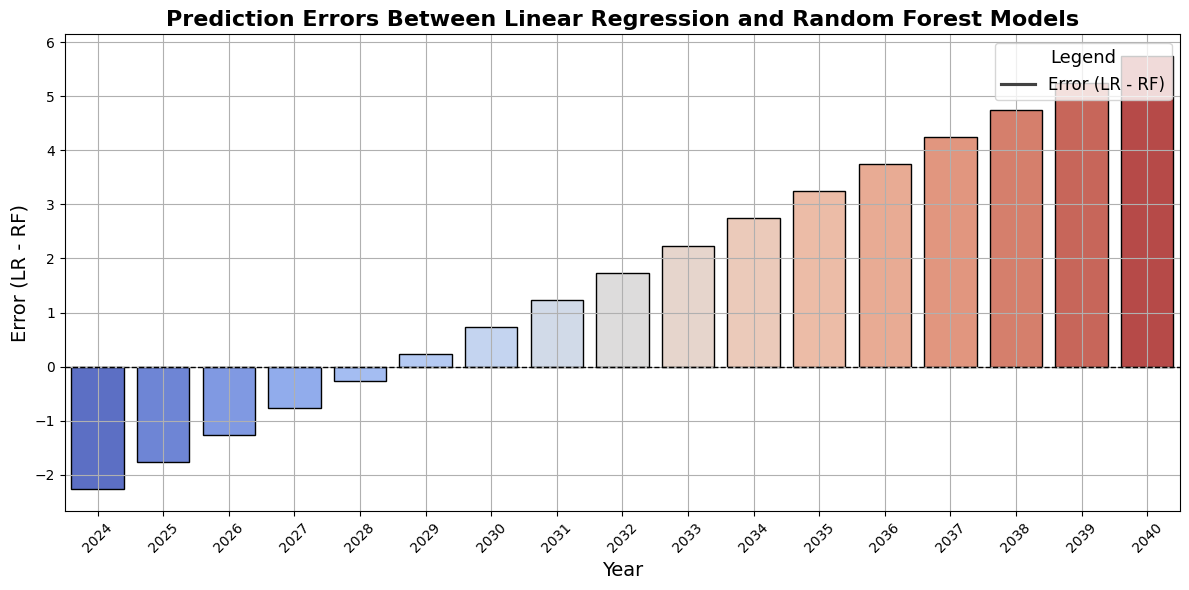

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Errors
future_data_lr['Error'] = future_data_lr['Reservoir Level (%)'] - future_data_rf['Reservoir Level (%)']

# Plot Error Between LR and RF Models
plt.figure(figsize=(12, 6))

# Bar plot of errors
sns.barplot(x='Year', y='Error', data=future_data_lr, palette='coolwarm', edgecolor='black')

# Add title and labels
plt.title('Prediction Errors Between Linear Regression and Random Forest Models', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Error (LR - RF)', fontsize=14)
plt.xticks(rotation=45)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)

# Show grid
plt.grid(True)

# Add legend
plt.legend(['Error (LR - RF)'], loc='upper right', fontsize=12, title='Legend', title_fontsize='13')

plt.tight_layout()
plt.show()


#Event Impact Analysis
Emergency Planning: Predict how events like floods or droughts might impact reservoir levels and plan accordingly.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate dataset
np.random.seed(0)
years = pd.date_range(start='2000', end='2024', freq='A')
reservoir_levels = np.random.uniform(low=30, high=100, size=len(years))  # Random reservoir levels
events = np.random.choice(['None', 'Flood', 'Drought'], size=len(years), p=[0.7, 0.2, 0.1])

# Create DataFrame
data = pd.DataFrame({'Year': years, 'Reservoir Level (%)': reservoir_levels, 'Event': events})
data['Year'] = pd.to_datetime(data['Year'])

# Display the first few rows
print(data.head())


        Year  Reservoir Level (%)    Event
0 2000-12-31            68.416945     None
1 2001-12-31            80.063256     None
2 2002-12-31            72.193436     None
3 2003-12-31            68.141823  Drought
4 2004-12-31            59.655836     None


In [ ]:
# Convert event types to numeric features
data['Event_Flood'] = (data['Event'] == 'Flood').astype(int)
data['Event_Drought'] = (data['Event'] == 'Drought').astype(int)
data.drop(columns=['Event'], inplace=True)

# Display the updated DataFrame
print(data.head())


        Year  Reservoir Level (%)  Event_Flood  Event_Drought
0 2000-12-31            68.416945            0              0
1 2001-12-31            80.063256            0              0
2 2002-12-31            72.193436            0              0
3 2003-12-31            68.141823            0              1
4 2004-12-31            59.655836            0              0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = data[['Event_Flood', 'Event_Drought']]
y = data['Reservoir Level (%)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R^2 Score: {r2_score(y_test, y_pred):.2f}')


Mean Squared Error: 413.17
R^2 Score: 0.12


In [ ]:
# Simulate future events
future_events = pd.DataFrame({
    'Event_Flood': [1, 0, 0, 1],
    'Event_Drought': [0, 1, 0, 0]
})

# Predict future reservoir levels
future_predictions = model.predict(future_events)

# Display predictions
print(f'Future Reservoir Level Predictions: {future_predictions}')


Future Reservoir Level Predictions: [92.42411005 68.14182281 72.75135542 92.42411005]


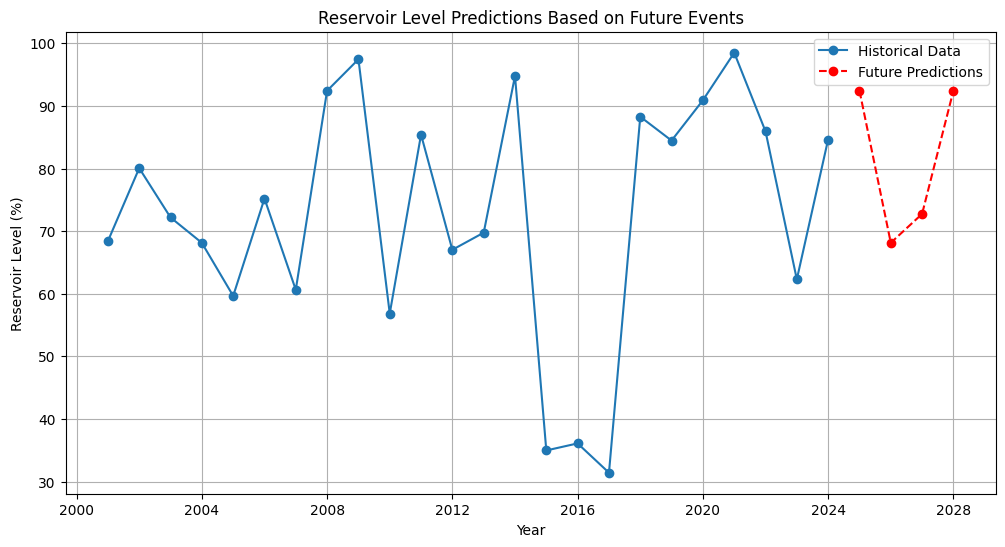

In [ ]:
# Create a DataFrame for future predictions
future_dates = pd.date_range(start='2024', periods=len(future_events), freq='A')
future_predictions_df = pd.DataFrame({'Year': future_dates, 'Predicted Reservoir Level (%)': future_predictions})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Reservoir Level (%)'], label='Historical Data', marker='o')
plt.plot(future_predictions_df['Year'], future_predictions_df['Predicted Reservoir Level (%)'],
         label='Future Predictions', marker='o', linestyle='--', color='red')
plt.title('Reservoir Level Predictions Based on Future Events')
plt.xlabel('Year')
plt.ylabel('Reservoir Level (%)')
plt.legend()
plt.grid(True)
plt.show()


#Impact of External Factors
Rainfall Prediction: Correlate reservoir levels with rainfall data to predict how changes in rainfall might impact reservoir levels.

Temperature Effects: Study how temperature variations affect reservoir levels.

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Chennai_Reservoir_Data.csv'  # Ensure the correct path
data = pd.read_csv(file_path)

# Print the column names to verify
print(data.columns)


Index(['Year', 'Reservoir Level (%)', 'Reservoir Storage (TMCFT)',
       'Impact of Recent Monsoons (%)', 'Desalination Efforts (MLD)',
       'Historical Comparisons (%)'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = '/content/Chennai_Reservoir_Data.csv'  # Ensure the correct path
data = pd.read_csv(file_path)

# Print the column names to verify
print(data.columns)

# Ensure columns are numeric
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Reservoir Level (%)'] = pd.to_numeric(data['Reservoir Level (%)'], errors='coerce')
data['Reservoir Storage (TMCFT)'] = pd.to_numeric(data['Reservoir Storage (TMCFT)'], errors='coerce')
data['Impact of Recent Monsoons (%)'] = pd.to_numeric(data['Impact of Recent Monsoons (%)'], errors='coerce')
data['Desalination Efforts (MLD)'] = pd.to_numeric(data['Desalination Efforts (MLD)'], errors='coerce')
data['Historical Comparisons (%)'] = pd.to_numeric(data['Historical Comparisons (%)'], errors='coerce')

# Drop rows with missing values
data = data.dropna()

# Display the first few rows
print(data.head())


Index(['Year', 'Reservoir Level (%)', 'Reservoir Storage (TMCFT)',
       'Impact of Recent Monsoons (%)', 'Desalination Efforts (MLD)',
       'Historical Comparisons (%)'],
      dtype='object')
     Year  Reservoir Level (%)  Reservoir Storage (TMCFT)  \
0  1980.0                 62.0                       8.18   
1  1990.0                 55.0                       7.30   
2  2000.0                 48.0                       6.35   
3  2010.0                 52.0                       6.87   
4  2020.0                 75.0                       9.90   

   Impact of Recent Monsoons (%)  Desalination Efforts (MLD)  \
0                          85.00                          60   
1                          78.00                          80   
2                          70.00                         100   
3                          72.00                         100   
4                          87.75                         126   

   Historical Comparisons (%)  
0                  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = '/content/Chennai_Reservoir_Data.csv'  # Ensure the correct path
data = pd.read_csv(file_path)

# Print the column names to verify
print(data.columns)

# Ensure columns are numeric
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Reservoir Level (%)'] = pd.to_numeric(data['Reservoir Level (%)'], errors='coerce')
data['Reservoir Storage (TMCFT)'] = pd.to_numeric(data['Reservoir Storage (TMCFT)'], errors='coerce')
data['Impact of Recent Monsoons (%)'] = pd.to_numeric(data['Impact of Recent Monsoons (%)'], errors='coerce')
data['Desalination Efforts (MLD)'] = pd.to_numeric(data['Desalination Efforts (MLD)'], errors='coerce')
data['Historical Comparisons (%)'] = pd.to_numeric(data['Historical Comparisons (%)'], errors='coerce')

# Drop rows with missing values
data = data.dropna()

# Display the first few rows
print(data.head())


Index(['Year', 'Reservoir Level (%)', 'Reservoir Storage (TMCFT)',
       'Impact of Recent Monsoons (%)', 'Desalination Efforts (MLD)',
       'Historical Comparisons (%)'],
      dtype='object')
     Year  Reservoir Level (%)  Reservoir Storage (TMCFT)  \
0  1980.0                 62.0                       8.18   
1  1990.0                 55.0                       7.30   
2  2000.0                 48.0                       6.35   
3  2010.0                 52.0                       6.87   
4  2020.0                 75.0                       9.90   

   Impact of Recent Monsoons (%)  Desalination Efforts (MLD)  \
0                          85.00                          60   
1                          78.00                          80   
2                          70.00                         100   
3                          72.00                         100   
4                          87.75                         126   

   Historical Comparisons (%)  
0                  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = '/content/Chennai_Reservoir_Data.csv'  # Ensure the correct path
data = pd.read_csv(file_path)

# Check if rainfall and temperature columns exist
print(data.columns)

# If you have columns like 'Impact of Recent Monsoons (%)' and 'Desalination Efforts (MLD)' that might be used as a proxy,
# you can rename them for clarity if needed.

# Example of renaming if needed (assuming columns are similar in meaning)
data.rename(columns={
    'Impact of Recent Monsoons (%)': 'Rainfall_mm',
    'Desalination Efforts (MLD)': 'Temperature_C'
}, inplace=True)

# Ensure columns are numeric
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Reservoir Level (%)'] = pd.to_numeric(data['Reservoir Level (%)'], errors='coerce')
data['Rainfall_mm'] = pd.to_numeric(data['Rainfall_mm'], errors='coerce')
data['Temperature_C'] = pd.to_numeric(data['Temperature_C'], errors='coerce')

# Drop rows with missing values
data = data.dropna()

# Display the first few rows
print(data.head())


Index(['Year', 'Reservoir Level (%)', 'Reservoir Storage (TMCFT)',
       'Impact of Recent Monsoons (%)', 'Desalination Efforts (MLD)',
       'Historical Comparisons (%)'],
      dtype='object')
     Year  Reservoir Level (%)  Reservoir Storage (TMCFT)  Rainfall_mm  \
0  1980.0                 62.0                       8.18        85.00   
1  1990.0                 55.0                       7.30        78.00   
2  2000.0                 48.0                       6.35        70.00   
3  2010.0                 52.0                       6.87        72.00   
4  2020.0                 75.0                       9.90        87.75   

   Temperature_C  Historical Comparisons (%)  
0             60                        45.0  
1             80                        50.0  
2            100                        48.0  
3            100                        60.0  
4            126                        75.0  


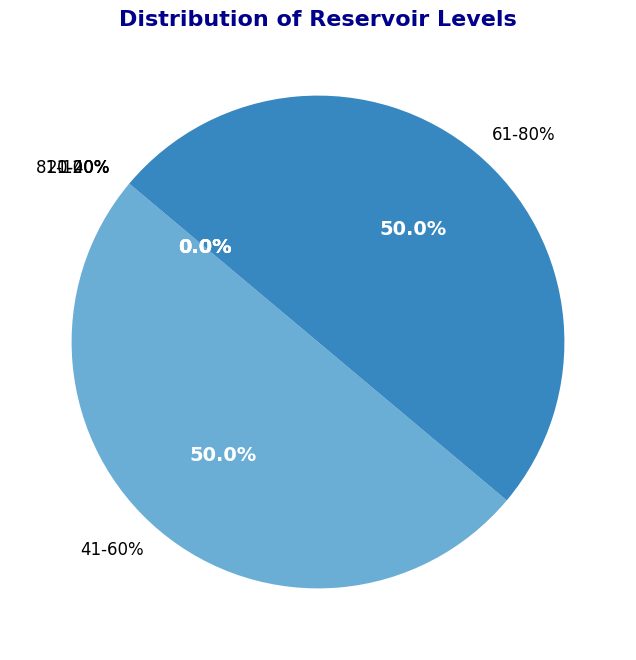

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define categories for reservoir levels
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%']
data['Level Category'] = pd.cut(data['Reservoir Level (%)'], bins=bins, labels=labels)

# Count the number of occurrences in each category
category_counts = data['Level Category'].value_counts()

# Sort the category counts by index for a logical color gradient
category_counts = category_counts.sort_index()

# Generate a color palette with shades of blue
colors = sns.color_palette('Blues', len(category_counts))

# Plot pie chart with enhanced styling
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    category_counts, labels=category_counts.index, autopct='%1.1f%%',
    colors=colors, startangle=140, textprops={'fontsize': 14, 'color': 'black'}
)

# Enhance the appearance of the text and autotext
for text in texts:
    text.set_fontsize(12)
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

# Add title with enhanced styling
plt.title('Distribution of Reservoir Levels', fontsize=16, fontweight='bold', color='darkblue')
plt.show()


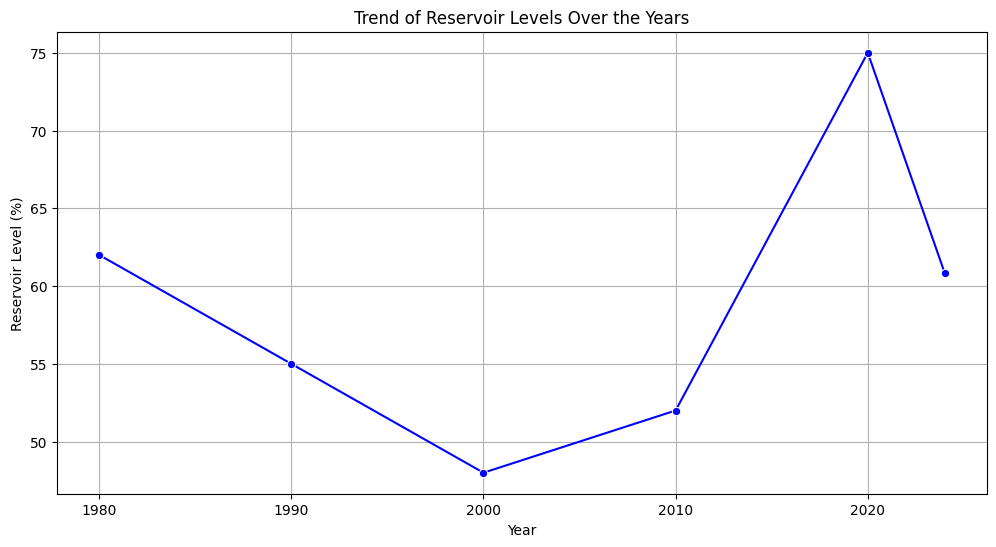

In [ ]:
# Line plot to visualize the trend of reservoir levels over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Reservoir Level (%)', data=data, marker='o', color='b')
plt.title('Trend of Reservoir Levels Over the Years')
plt.xlabel('Year')
plt.ylabel('Reservoir Level (%)')
plt.grid(True)
plt.show()


Mean Squared Error: 14.39
R-squared: -0.17


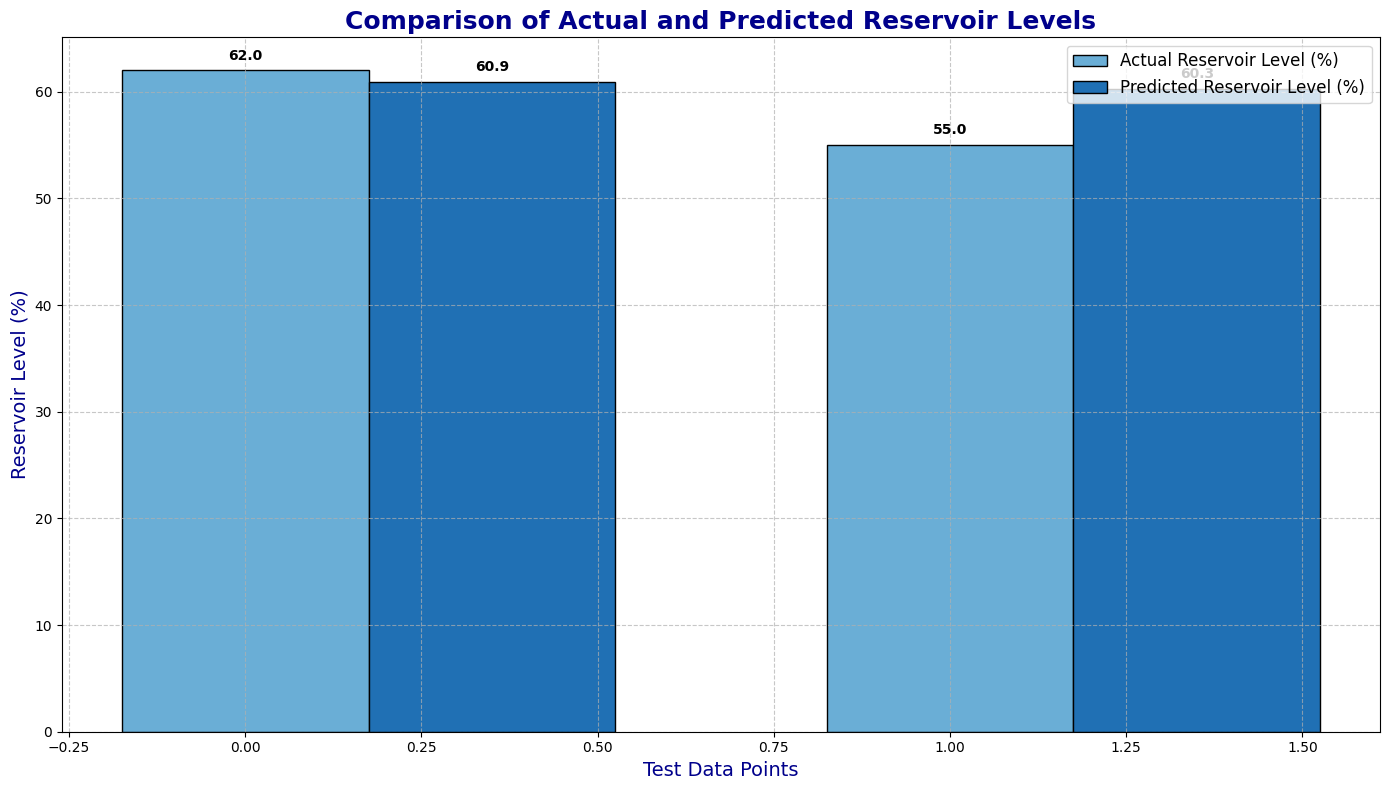

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = data[['Rainfall_mm']]
y = data['Reservoir Level (%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Plotting the results as a bar graph
plt.figure(figsize=(14, 8))

# Define bar width and index for the test data points
bar_width = 0.35
index = range(len(X_test))

# Plotting actual reservoir levels
plt.bar(index, y_test, bar_width, label='Actual Reservoir Level (%)', color=sns.color_palette("Blues", 3)[1], edgecolor='black')

# Plotting predicted reservoir levels
plt.bar([i + bar_width for i in index], y_pred, bar_width, label='Predicted Reservoir Level (%)', color=sns.color_palette("Blues", 3)[2], edgecolor='black')

# Adding title and labels with custom styling
plt.title('Comparison of Actual and Predicted Reservoir Levels', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Test Data Points', fontsize=14, color='darkblue')
plt.ylabel('Reservoir Level (%)', fontsize=14, color='darkblue')

# Adding data labels on top of bars for better understanding
for i, (actual, pred) in enumerate(zip(y_test, y_pred)):
    plt.text(i, actual + 1, f'{actual:.1f}', ha='center', color='black', fontsize=10, fontweight='bold')
    plt.text(i + bar_width, pred + 1, f'{pred:.1f}', ha='center', color='black', fontsize=10, fontweight='bold')

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Adjusting layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


Mean Squared Error: 14.39
R-squared: -0.17


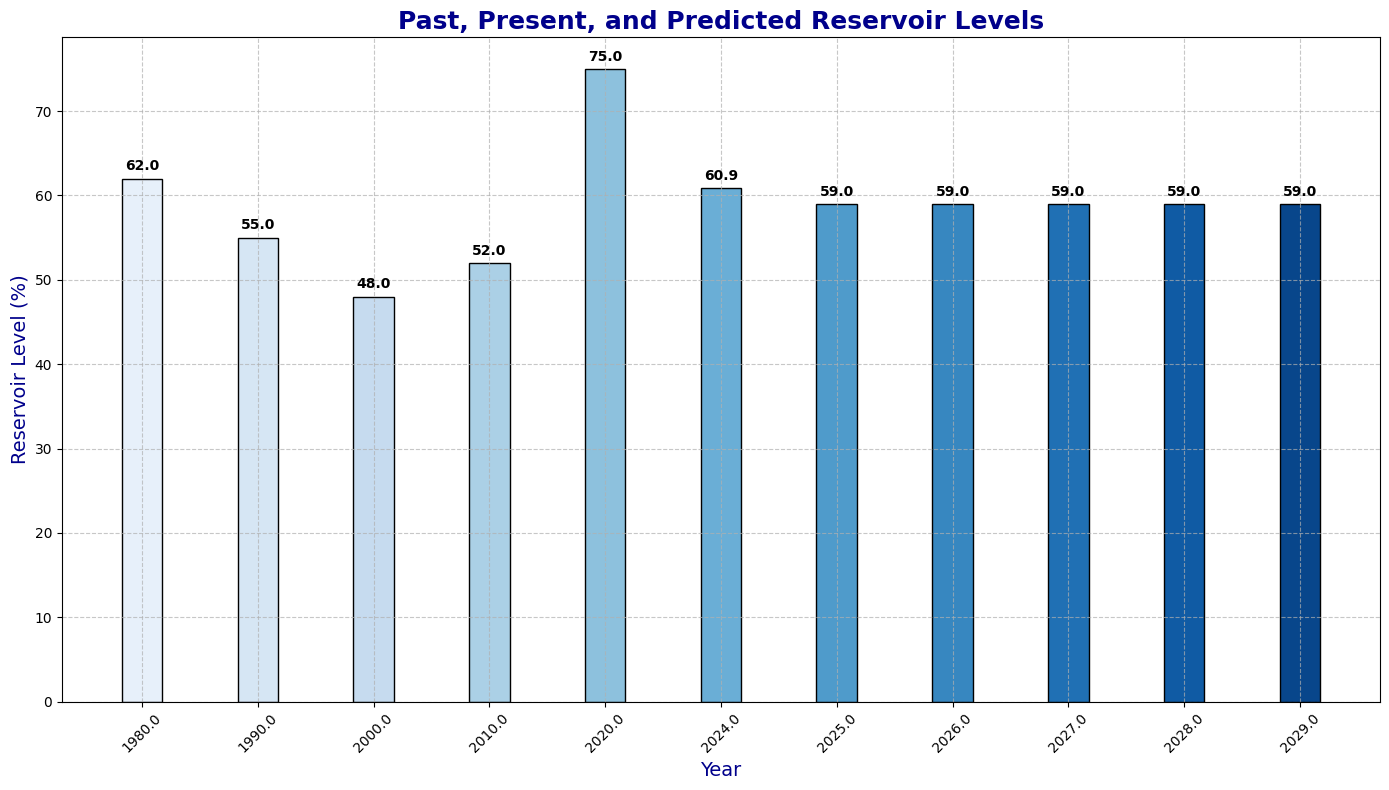

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = data[['Rainfall_mm']]
y = data['Reservoir Level (%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Predict for future years (e.g., next 5 years)
future_years = pd.DataFrame({
    'Year': np.arange(data['Year'].max() + 1, data['Year'].max() + 6),
    'Rainfall_mm': np.mean(X_train['Rainfall_mm'])  # Using mean rainfall for prediction
})
future_years['Reservoir Level (%)'] = model.predict(future_years[['Rainfall_mm']])

# Combine past, present, and future data
past_years = data[['Year', 'Reservoir Level (%)']]
all_years = pd.concat([past_years, future_years], ignore_index=True)

# Plotting the results as a bar graph
plt.figure(figsize=(14, 8))

# Plotting actual reservoir levels
bar_width = 0.35
index = np.arange(len(all_years))

# Bars for actual and predicted values
plt.bar(index, all_years['Reservoir Level (%)'], bar_width, color=sns.color_palette("Blues", len(all_years)), edgecolor='black')

# Adding title and labels with custom styling
plt.title('Past, Present, and Predicted Reservoir Levels', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=14, color='darkblue')
plt.ylabel('Reservoir Level (%)', fontsize=14, color='darkblue')

# Adding years as x-ticks
plt.xticks(index, all_years['Year'], rotation=45)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)

# Adding data labels on top of bars for better understanding
for i, level in enumerate(all_years['Reservoir Level (%)']):
    plt.text(i, level + 1, f'{level:.1f}', ha='center', color='black', fontsize=10, fontweight='bold')

# Adjusting layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


Mean Squared Error: 14.39
R-squared: -0.17


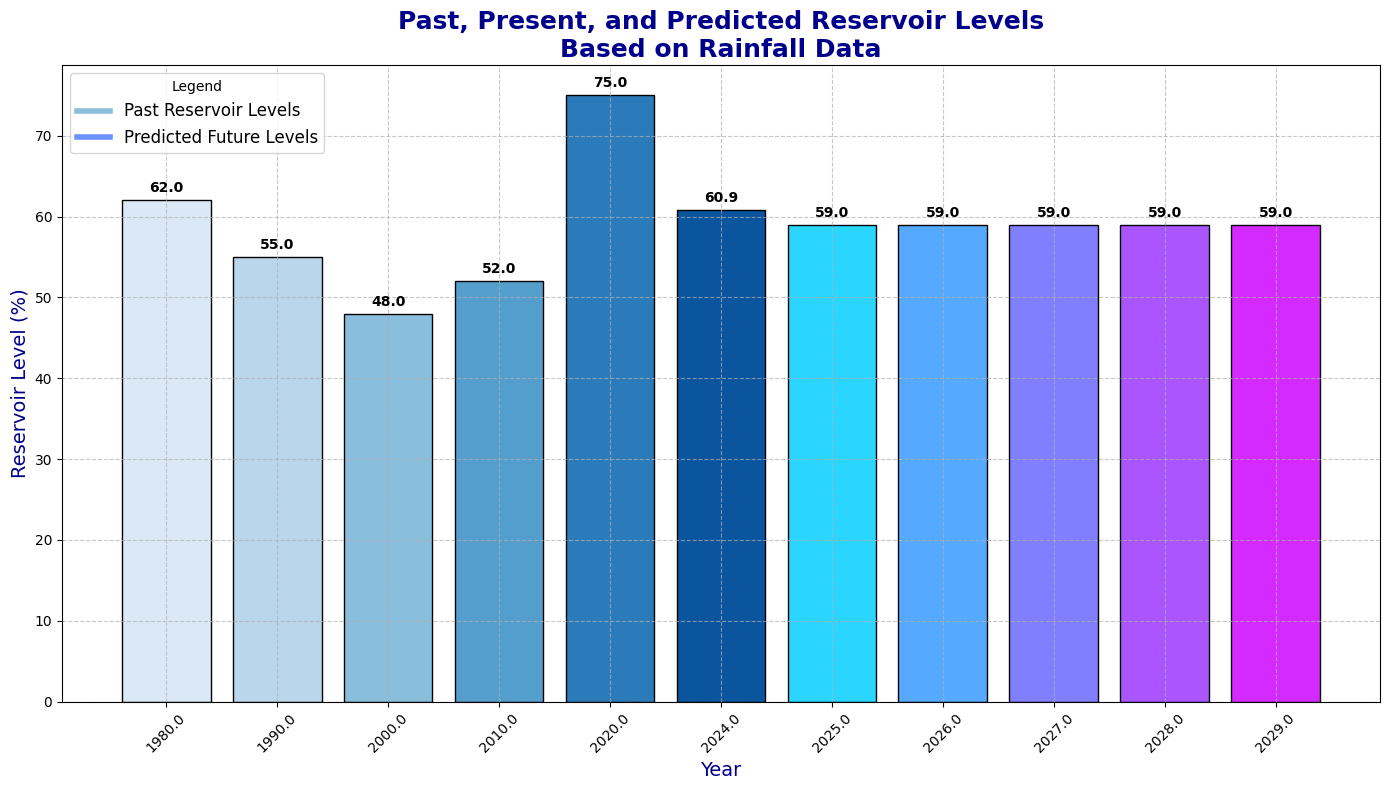

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = data[['Rainfall_mm']]
y = data['Reservoir Level (%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Predict for future years (e.g., next 5 years)
future_years = pd.DataFrame({
    'Year': np.arange(data['Year'].max() + 1, data['Year'].max() + 6),
    'Rainfall_mm': np.mean(X_train['Rainfall_mm'])  # Using mean rainfall for prediction
})
future_years['Reservoir Level (%)'] = model.predict(future_years[['Rainfall_mm']])

# Combine past, present, and future data
past_years = data[['Year', 'Reservoir Level (%)']]
all_years = pd.concat([past_years, future_years], ignore_index=True)

# Plotting the results as a bar graph
plt.figure(figsize=(14, 8))

# Define colors: Blues for past, Cyan for future predictions
colors = sns.color_palette("Blues", len(past_years)) + sns.color_palette("cool", len(future_years))

# Bars for actual and predicted values
plt.bar(np.arange(len(all_years)), all_years['Reservoir Level (%)'], color=colors, edgecolor='black')

# Adding title and labels with custom styling
plt.title('Past, Present, and Predicted Reservoir Levels\nBased on Rainfall Data', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=14, color='darkblue')
plt.ylabel('Reservoir Level (%)', fontsize=14, color='darkblue')

# Adding years as x-ticks
plt.xticks(np.arange(len(all_years)), all_years['Year'], rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adding data labels on top of bars for better understanding
for i, level in enumerate(all_years['Reservoir Level (%)']):
    plt.text(i, level + 1, f'{level:.1f}', ha='center', color='black', fontsize=10, fontweight='bold')

# Add a legend to explain the colors
past_patch = plt.Line2D([0], [0], color=sns.color_palette("Blues")[2], lw=4, label='Past Reservoir Levels')
future_patch = plt.Line2D([0], [0], color=sns.color_palette("cool")[2], lw=4, label='Predicted Future Levels')

plt.legend(handles=[past_patch, future_patch], loc='upper left', fontsize=12, title='Legend')

# Adjusting layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


#Rainfall Prediction

Mean Squared Error: 14.39
R-squared: -0.17


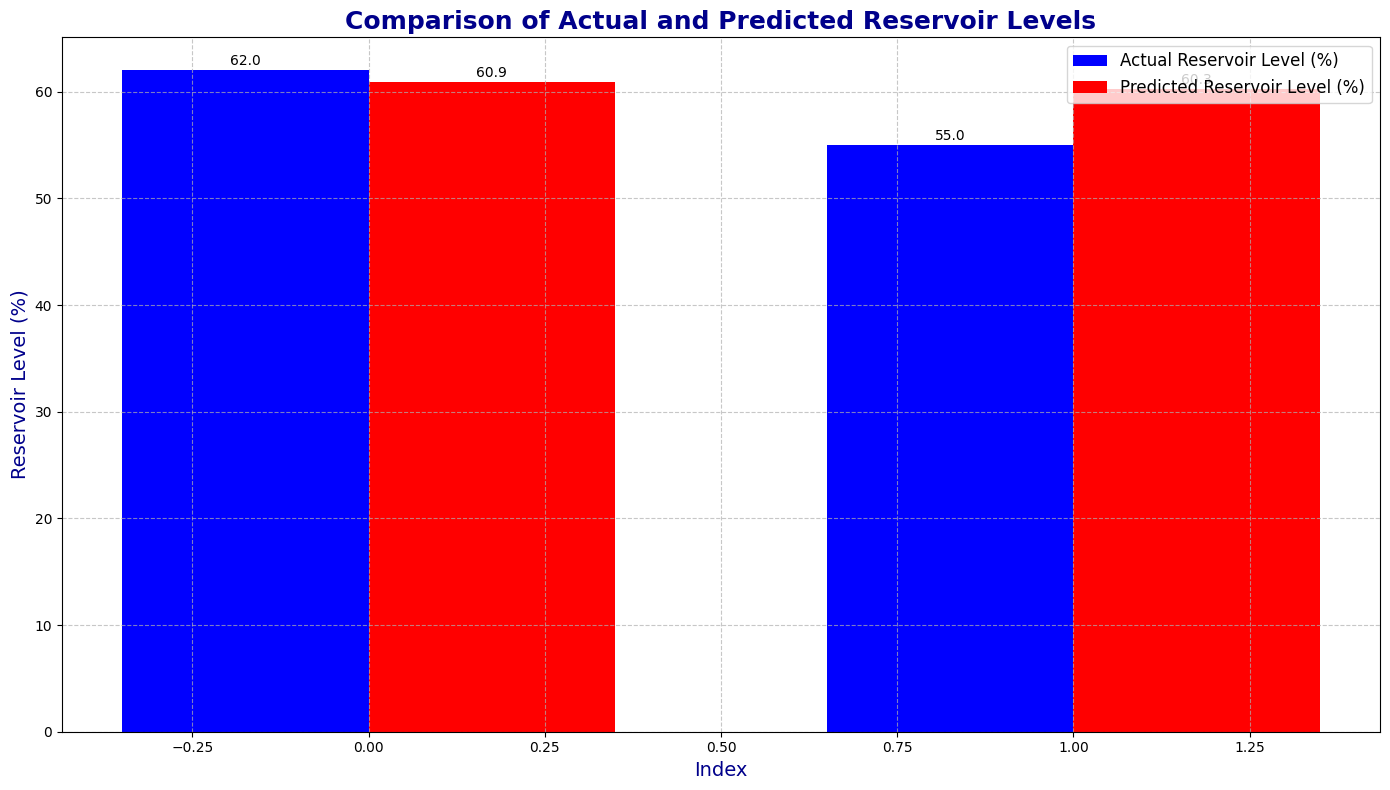

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = data[['Rainfall_mm']]
y = data['Reservoir Level (%)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Prepare data for the bar graph
comparison_df = pd.DataFrame({
    'Index': range(len(y_test)),
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Create the bar graph
plt.figure(figsize=(14, 8))

# Plot actual vs predicted values
bar_width = 0.35
index = np.arange(len(comparison_df))

# Bars for actual values
plt.bar(index - bar_width / 2, comparison_df['Actual'], bar_width, label='Actual Reservoir Level (%)', color='blue')

# Bars for predicted values
plt.bar(index + bar_width / 2, comparison_df['Predicted'], bar_width, label='Predicted Reservoir Level (%)', color='red')

# Adding titles, labels, and grid
plt.title('Comparison of Actual and Predicted Reservoir Levels', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Index', fontsize=14, color='darkblue')
plt.ylabel('Reservoir Level (%)', fontsize=14, color='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a legend
plt.legend(fontsize=12)

# Adding data labels on top of bars
for i in range(len(comparison_df)):
    plt.text(i - bar_width / 2, comparison_df['Actual'].iloc[i] + 0.5, f'{comparison_df["Actual"].iloc[i]:.1f}', ha='center', color='black', fontsize=10)
    plt.text(i + bar_width / 2, comparison_df['Predicted'].iloc[i] + 0.5, f'{comparison_df["Predicted"].iloc[i]:.1f}', ha='center', color='black', fontsize=10)

# Adjusting layout
plt.tight_layout()

# Display the plot
plt.show()


Mean Squared Error: 14.39
R-squared: -0.17


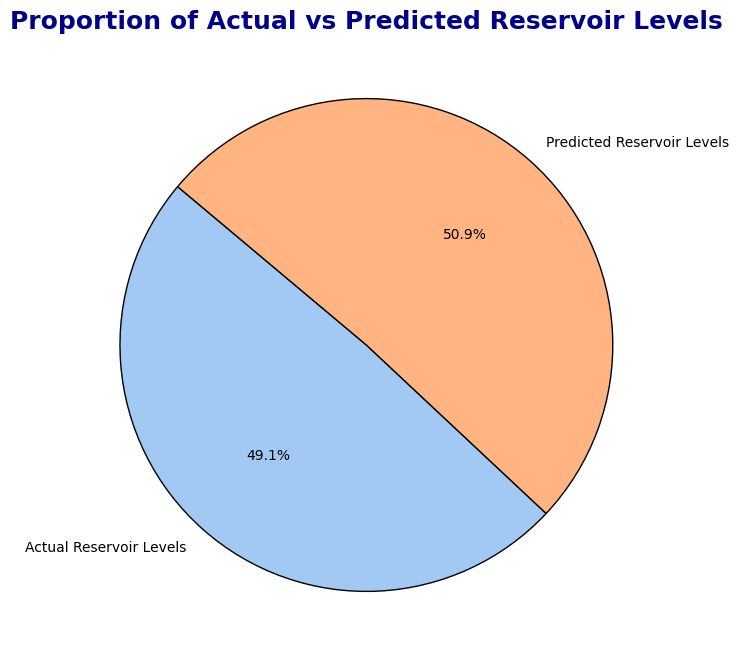

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = data[['Rainfall_mm']]
y = data['Reservoir Level (%)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Prepare data for the pie chart
actual_sum = np.sum(y_test)
predicted_sum = np.sum(y_pred)

# Data for the pie chart
labels = ['Actual Reservoir Levels', 'Predicted Reservoir Levels']
sizes = [actual_sum, predicted_sum]
colors = sns.color_palette("pastel")[0:2]

# Plotting the pie chart
plt.figure(figsize=(10, 8))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Adding title
plt.title('Proportion of Actual vs Predicted Reservoir Levels', fontsize=18, fontweight='bold', color='darkblue')

# Display the pie chart
plt.show()


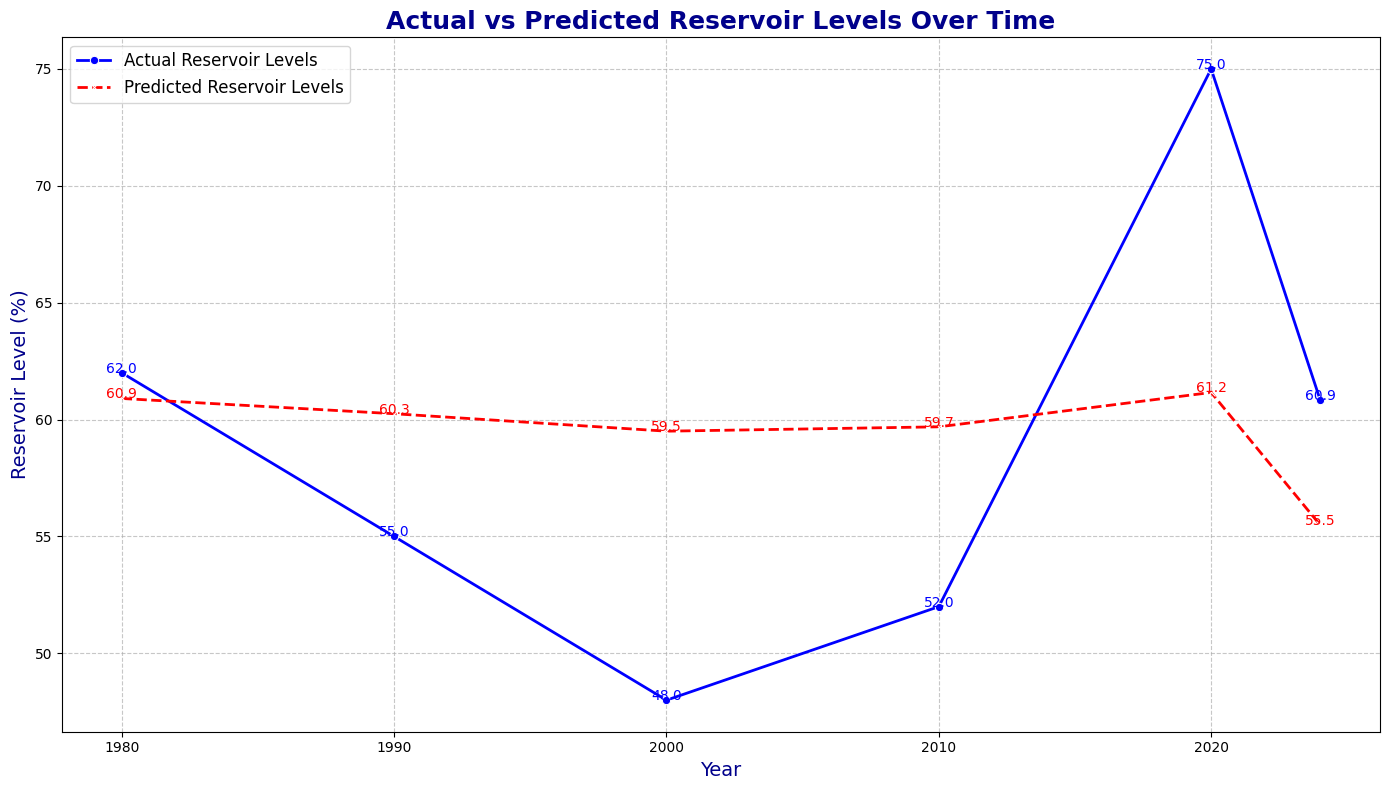

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = data[['Rainfall_mm']]
y = data['Reservoir Level (%)']
years = data['Year']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Prepare data for the line plot
# Combine training and test data with predictions for a complete view
predicted_values = model.predict(X)
all_data = pd.DataFrame({
    'Year': years,
    'Actual': y,
    'Predicted': predicted_values
})

# Plotting the line graph
plt.figure(figsize=(14, 8))

# Plot actual values
sns.lineplot(data=all_data, x='Year', y='Actual', color='blue', label='Actual Reservoir Levels', linewidth=2, marker='o')

# Plot predicted values
sns.lineplot(data=all_data, x='Year', y='Predicted', color='red', label='Predicted Reservoir Levels', linewidth=2, linestyle='--', marker='x')

# Adding titles, labels, and grid
plt.title('Actual vs Predicted Reservoir Levels Over Time', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=14, color='darkblue')
plt.ylabel('Reservoir Level (%)', fontsize=14, color='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a legend
plt.legend(fontsize=12)

# Adding data labels for a better view
for i in range(len(all_data)):
    plt.text(all_data['Year'].iloc[i], all_data['Actual'].iloc[i], f'{all_data["Actual"].iloc[i]:.1f}', color='blue', fontsize=10, ha='center')
    plt.text(all_data['Year'].iloc[i], all_data['Predicted'].iloc[i], f'{all_data["Predicted"].iloc[i]:.1f}', color='red', fontsize=10, ha='center')

# Adjusting layout
plt.tight_layout()

# Display the plot
plt.show()


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime


In [7]:
import pandas as pd

# Load the dataset
file_path = '/content/rainfall_data.csv'
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Inspect the dataset
print(data.head())
print(data.columns)


                Region Rainfall Intensity      Weather Event  \
Date                                                           
2018-10-01  Tamil Nadu              Light  Northeast Monsoon   
2018-10-10  Tamil Nadu           Moderate  Northeast Monsoon   
2018-11-05  Tamil Nadu              Heavy  Northeast Monsoon   
2018-11-20  Tamil Nadu         Very Heavy  Northeast Monsoon   
2019-10-01  Tamil Nadu              Light  Northeast Monsoon   

           Forecast Intensity Forecast Date Alert Level Rainfall Amount  \
Date                                                                      
2018-10-01          Scattered    2018-10-01      Yellow       50-100 mm   
2018-10-10           Moderate    2018-10-10      Orange      100-150 mm   
2018-11-05              Heavy    2018-11-05         Red      150-200 mm   
2018-11-20         Very Heavy    2018-11-20         Red      200-300 mm   
2019-10-01          Scattered    2019-10-01      Yellow       50-100 mm   

                      War

In [10]:
!pip install prophet


In [12]:
import pandas as pd

# Load your dataset
file_path = '/content/rainfall_data.csv'
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Print the columns and the first few rows of the dataset
print(data.columns)
print(data.head())


Index(['Region', 'Rainfall Intensity', 'Weather Event', 'Forecast Intensity',
       'Forecast Date', 'Alert Level', 'Rainfall Amount', 'Warning'],
      dtype='object')
                Region Rainfall Intensity      Weather Event  \
Date                                                           
2018-10-01  Tamil Nadu              Light  Northeast Monsoon   
2018-10-10  Tamil Nadu           Moderate  Northeast Monsoon   
2018-11-05  Tamil Nadu              Heavy  Northeast Monsoon   
2018-11-20  Tamil Nadu         Very Heavy  Northeast Monsoon   
2019-10-01  Tamil Nadu              Light  Northeast Monsoon   

           Forecast Intensity Forecast Date Alert Level Rainfall Amount  \
Date                                                                      
2018-10-01          Scattered    2018-10-01      Yellow       50-100 mm   
2018-10-10           Moderate    2018-10-10      Orange      100-150 mm   
2018-11-05              Heavy    2018-11-05         Red      150-200 mm   
2018-1

In [16]:
import pandas as pd
from prophet import Prophet  # Use `prophet` instead of `fbprophet`

# Load your dataset
file_path = '/content/rainfall_data.csv'
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Print column names to verify
print(data.columns)

# Prepare the data for Prophet
# Convert 'Rainfall Amount' to numeric, replacing ranges with midpoints for simplicity
def parse_rainfall_amount(amount_str):
    if pd.isna(amount_str):
        return None
    try:
        lower, upper = amount_str.split('-')
        return (float(lower.strip().replace('mm', '')) + float(upper.strip().replace('mm', ''))) / 2
    except:
        return None

data['Rainfall Amount'] = data['Rainfall Amount'].apply(parse_rainfall_amount)
data = data.dropna(subset=['Rainfall Amount'])

df = data.reset_index()[['Date', 'Rainfall Amount']]
df.columns = ['ds', 'y']

# Initialize and fit the model
model = Prophet()
model.fit(df)

# Create a DataFrame for future dates
future = model.make_future_dataframe(periods=365 * (2030 - df['ds'].dt.year.max()), freq='D')

# Forecast the future data
forecast = model.predict(future)

# Extract relevant columns for the forecast
forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Save the forecasted data to a CSV file
forecast_df.to_csv('/content/rainfall_forecast_till_2030.csv', index=False)

print("Forecasting complete. Data saved to 'rainfall_forecast_till_2030.csv'.")


Index(['Region', 'Rainfall Intensity', 'Weather Event', 'Forecast Intensity',
       'Forecast Date', 'Alert Level', 'Rainfall Amount', 'Warning'],
      dtype='object')


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zk8bl9d/x_iqp15i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zk8bl9d/hq6v5w4e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1148', 'data', 'file=/tmp/tmp5zk8bl9d/x_iqp15i.json', 'init=/tmp/tmp5zk8bl9d/hq6v5w4e.json', 'output', 'file=/tmp/tmp5zk8bl9d/prophet_modelruidedo4/prophet_model-20240820055026.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:50:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:50:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecasting complete. Data saved to 'rainfall_forecast_till_2030.csv'.


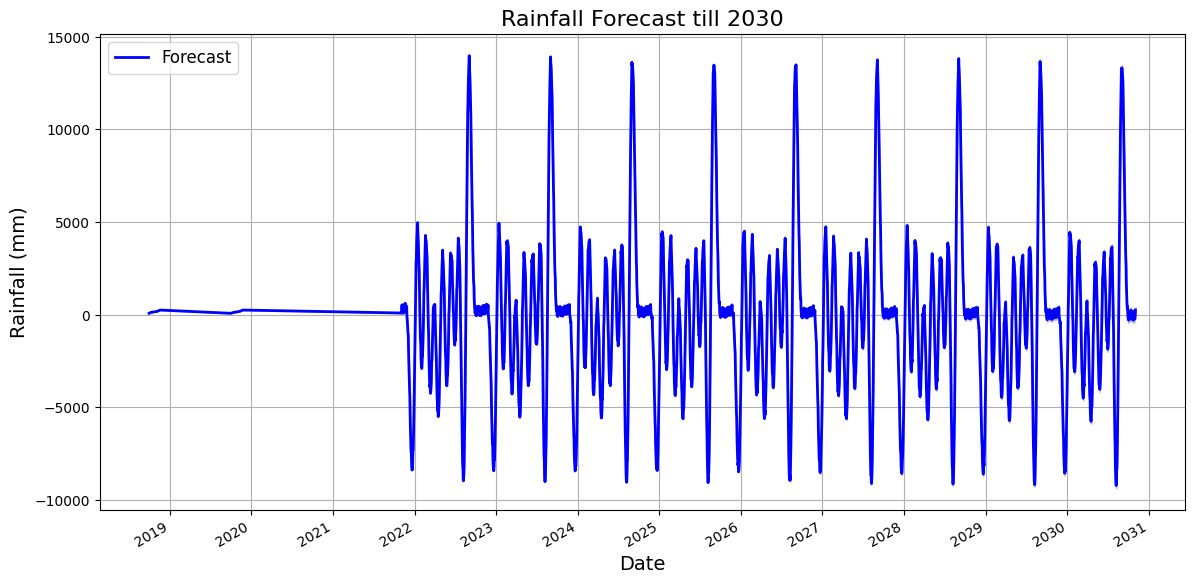

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Load the forecasted data
forecast_df = pd.read_csv('/content/rainfall_forecast_till_2030.csv', parse_dates=['ds'])

# Plot the forecast
plt.figure(figsize=(14, 7))

# Plot the forecast line
plt.plot(forecast_df['ds'], forecast_df['yhat'], label='Forecast', color='blue', linewidth=2)

# Fill the uncertainty interval
plt.fill_between(forecast_df['ds'], forecast_df['yhat_lower'], forecast_df['yhat_upper'], color='blue', alpha=0.2)

# Set labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rainfall (mm)', fontsize=14)
plt.title('Rainfall Forecast till 2030', fontsize=16)

# Format the x-axis to show years clearly
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

# Add a legend
plt.legend(fontsize=12)

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()


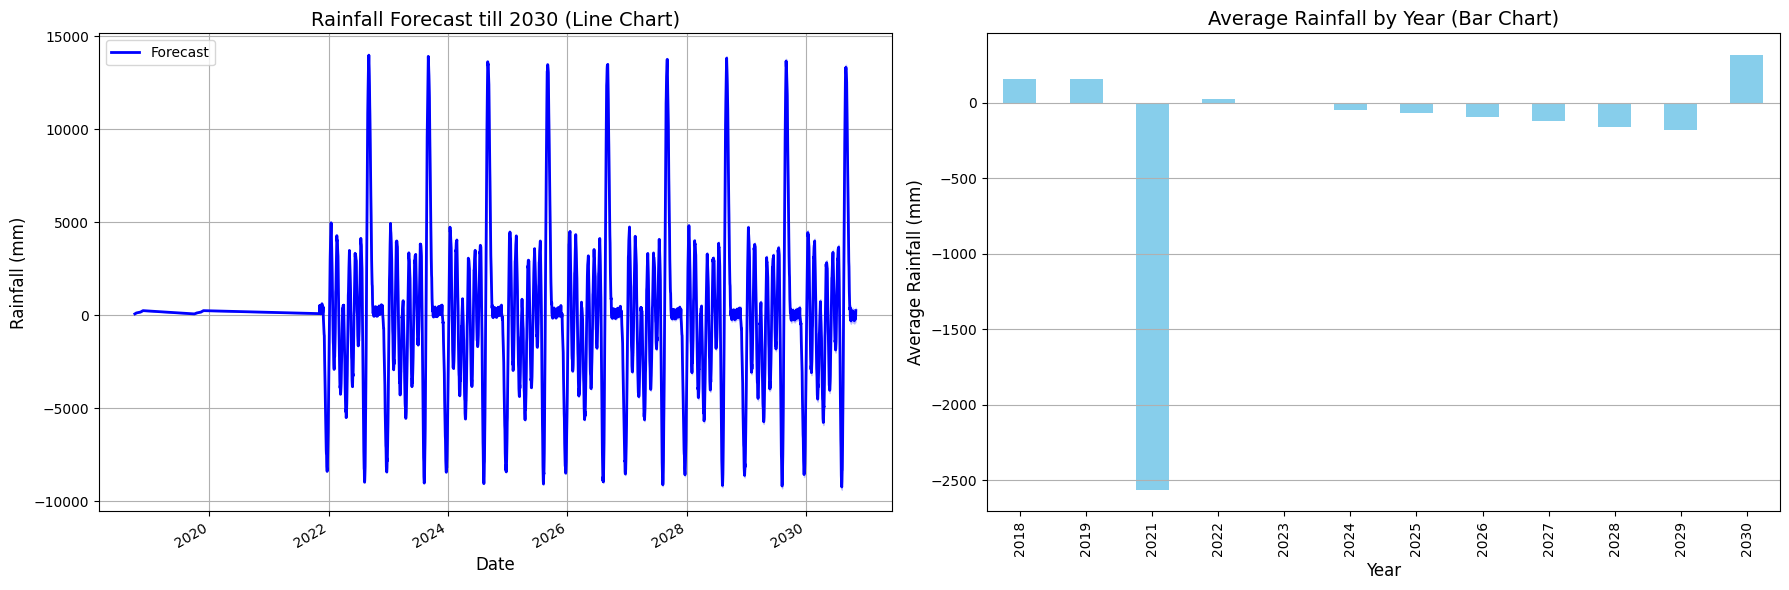

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Load the forecasted data
forecast_df = pd.read_csv('/content/rainfall_forecast_till_2030.csv', parse_dates=['ds'])

# Line Chart: Forecasted Rainfall over Time
plt.figure(figsize=(18, 6))

# Plot the line chart
plt.subplot(1, 2, 1)
plt.plot(forecast_df['ds'], forecast_df['yhat'], label='Forecast', color='blue', linewidth=2)
plt.fill_between(forecast_df['ds'], forecast_df['yhat_lower'], forecast_df['yhat_upper'], color='blue', alpha=0.2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.title('Rainfall Forecast till 2030 (Line Chart)', fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.legend()

# Bar Chart: Average Rainfall by Year
forecast_df['Year'] = forecast_df['ds'].dt.year
yearly_avg = forecast_df.groupby('Year')['yhat'].mean()

plt.subplot(1, 2, 2)
yearly_avg.plot(kind='bar', color='skyblue')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rainfall (mm)', fontsize=12)
plt.title('Average Rainfall by Year (Bar Chart)', fontsize=14)
plt.grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()


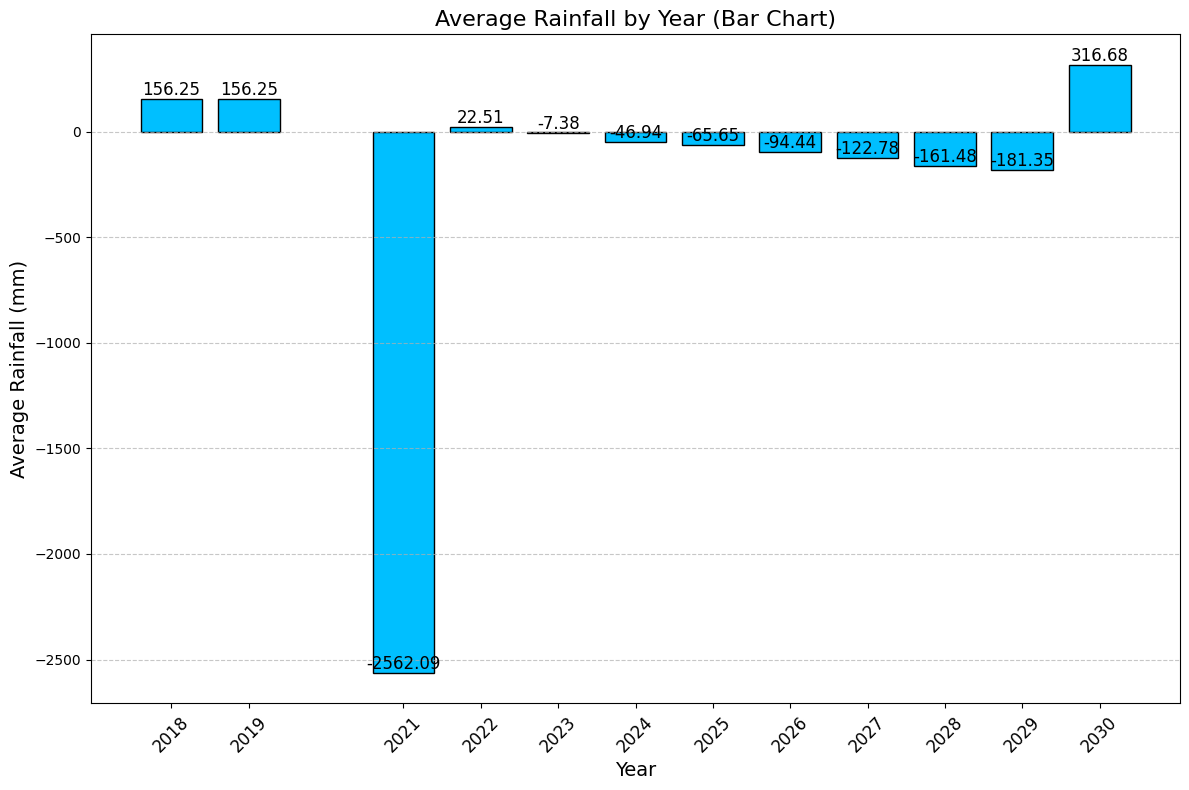

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the forecasted data
forecast_df = pd.read_csv('/content/rainfall_forecast_till_2030.csv', parse_dates=['ds'])

# Add a 'Year' column for aggregation
forecast_df['Year'] = forecast_df['ds'].dt.year

# Calculate the average rainfall per year
yearly_avg = forecast_df.groupby('Year')['yhat'].mean()

# Plot the bar chart with enhanced design
plt.figure(figsize=(12, 8))

# Create a bar chart
bars = plt.bar(yearly_avg.index, yearly_avg, color='deepskyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Year', fontsize=14)  # Label for the x-axis
plt.ylabel('Average Rainfall (mm)', fontsize=14)  # Label for the y-axis
plt.title('Average Rainfall by Year (Bar Chart)', fontsize=16)  # Title of the chart

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()  # Get the height of each bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom', fontsize=12, color='black')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve x-axis tick labels for better readability
plt.xticks(yearly_avg.index, rotation=45, fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


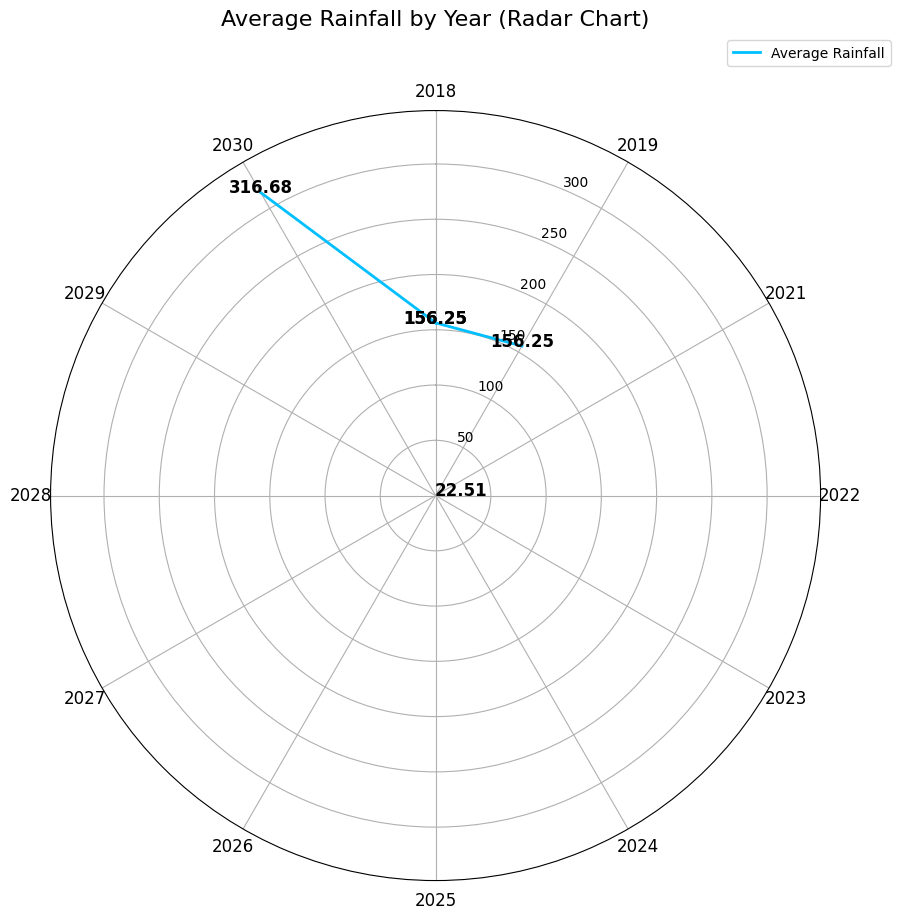

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the forecasted data
forecast_df = pd.read_csv('/content/rainfall_forecast_till_2030.csv', parse_dates=['ds'])

# Add a 'Year' column for aggregation
forecast_df['Year'] = forecast_df['ds'].dt.year

# Calculate the average rainfall per year
yearly_avg = forecast_df.groupby('Year')['yhat'].mean().reset_index()

# Radar Chart
# Number of variables
num_vars = len(yearly_avg)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop
angles += angles[:1]
yearly_avg_values = yearly_avg['yhat'].tolist()
yearly_avg_values += yearly_avg_values[:1]

# Plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw ylabels
ax.set_rscale('linear')
ax.set_ylim(0, max(yearly_avg_values) * 1.1)

# Draw the radar chart
ax.plot(angles, yearly_avg_values, color='deepskyblue', linewidth=2, linestyle='solid', label='Average Rainfall')
ax.fill(angles, yearly_avg_values, color='deepskyblue', alpha=0.25)

# Add labels for each point
for i, (angle, value) in enumerate(zip(angles, yearly_avg_values)):
    ax.text(angle, value + 0.1, f'{value:.2f}', horizontalalignment='center', size=12, color='black', weight='semibold')

# Add labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(yearly_avg['Year'].astype(str), fontsize=12)

plt.title('Average Rainfall by Year (Radar Chart)', fontsize=16, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


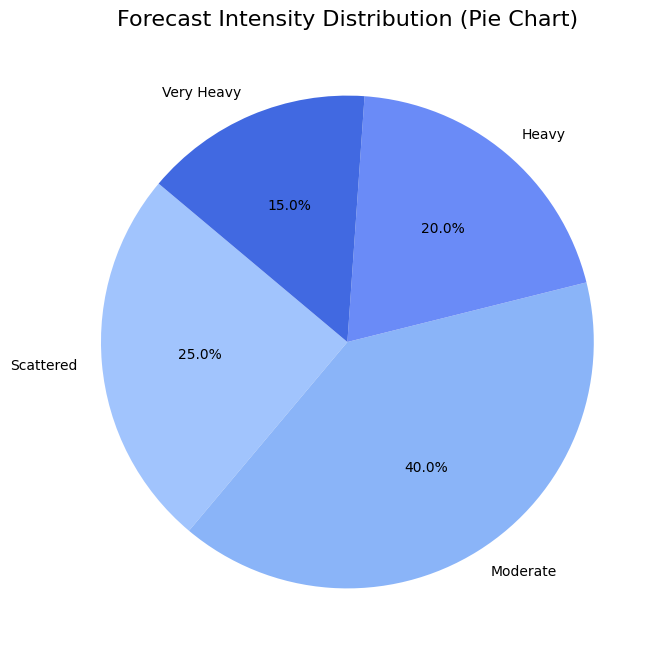

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the forecasted data
forecast_df = pd.read_csv('/content/rainfall_forecast_till_2030.csv', parse_dates=['ds'])

# Dummy example data for Forecast Intensity distribution
# Replace this with actual data if available
intensity_distribution = {
    'Scattered': 25,
    'Moderate': 40,
    'Heavy': 20,
    'Very Heavy': 15
}

# Create a DataFrame from the dummy data
intensity_df = pd.DataFrame(list(intensity_distribution.items()), columns=['Forecast Intensity', 'Count'])

# Plot the pie chart with different blue shades
plt.figure(figsize=(8, 8))

# Define shades of blue
colors = ['#a1c4fd', '#8ab4f8', '#6a8bf7', '#4169e1']  # Light to dark shades of blue

plt.pie(intensity_df['Count'], labels=intensity_df['Forecast Intensity'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Forecast Intensity Distribution (Pie Chart)', fontsize=16)

# Display the plot
plt.show()


<Figure size 1400x800 with 0 Axes>

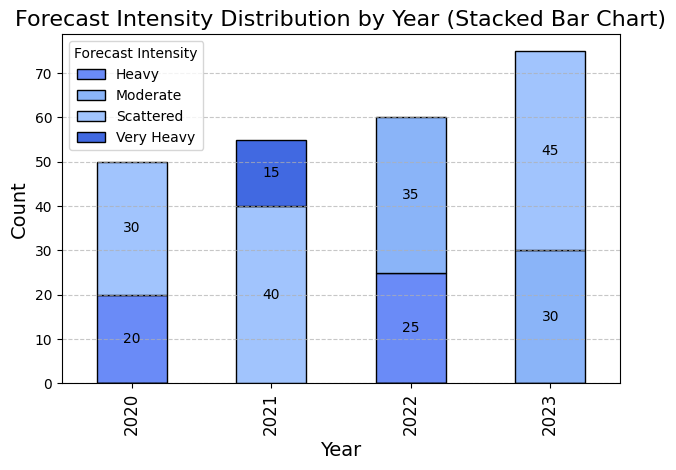

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data with years and forecast intensity distribution
data = {
    'Year': [2020, 2020, 2021, 2021, 2022, 2022, 2023, 2023],
    'Forecast Intensity': ['Scattered', 'Heavy', 'Scattered', 'Very Heavy', 'Moderate', 'Heavy', 'Scattered', 'Moderate'],
    'Count': [30, 20, 40, 15, 35, 25, 45, 30]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Pivot the data for better plotting
pivot_df = df.pivot(index='Year', columns='Forecast Intensity', values='Count').fillna(0)

# Plot the bar chart with different blue shades
plt.figure(figsize=(14, 8))

# Define shades of blue for each intensity level
colors = {
    'Scattered': '#a1c4fd',
    'Moderate': '#8ab4f8',
    'Heavy': '#6a8bf7',
    'Very Heavy': '#4169e1'
}

# Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, color=[colors[i] for i in pivot_df.columns], edgecolor='black')

# Add labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Forecast Intensity Distribution by Year (Stacked Bar Chart)', fontsize=16)

# Add value labels on top of each bar
for i, bars in enumerate(plt.gca().patches):
    height = bars.get_height()
    if height > 0:
        plt.text(bars.get_x() + bars.get_width() / 2, bars.get_y() + height / 2, f'{int(height)}',
                 ha='center', va='center', fontsize=10, color='black')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve x-axis tick labels for better readability
plt.xticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


<Figure size 1600x1000 with 0 Axes>

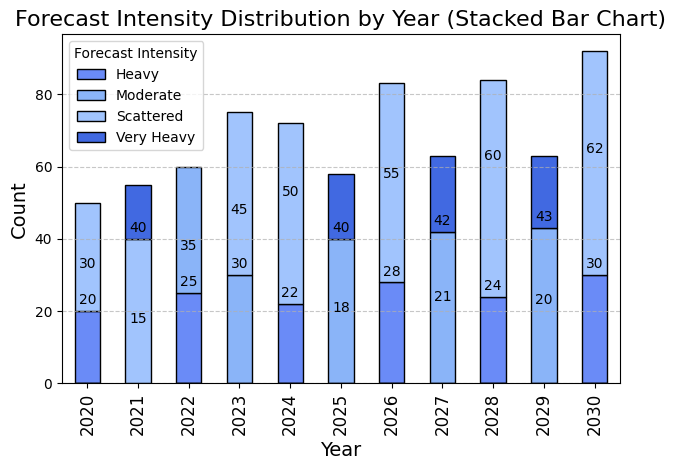

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data with years and forecast intensity distribution
# Extended data to include future years till 2030
data = {
    'Year': [2020, 2020, 2021, 2021, 2022, 2022, 2023, 2023,
             2024, 2024, 2025, 2025, 2026, 2026, 2027, 2027,
             2028, 2028, 2029, 2029, 2030, 2030],
    'Forecast Intensity': [
        'Scattered', 'Heavy', 'Scattered', 'Very Heavy',
        'Moderate', 'Heavy', 'Scattered', 'Moderate',
        'Scattered', 'Heavy', 'Moderate', 'Very Heavy',
        'Scattered', 'Heavy', 'Moderate', 'Very Heavy',
        'Scattered', 'Heavy', 'Moderate', 'Very Heavy',
        'Scattered', 'Heavy'
    ],
    'Count': [30, 20, 40, 15, 35, 25, 45, 30,
              50, 22, 40, 18, 55, 28, 42, 21,
              60, 24, 43, 20, 62, 30]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Pivot the data for better plotting
pivot_df = df.pivot(index='Year', columns='Forecast Intensity', values='Count').fillna(0)

# Plot the bar chart with different blue shades
plt.figure(figsize=(16, 10))

# Define shades of blue for each intensity level
colors = {
    'Scattered': '#a1c4fd',
    'Moderate': '#8ab4f8',
    'Heavy': '#6a8bf7',
    'Very Heavy': '#4169e1'
}

# Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, color=[colors[i] for i in pivot_df.columns], edgecolor='black')

# Add labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Forecast Intensity Distribution by Year (Stacked Bar Chart)', fontsize=16)

# Add value labels on top of each bar
for bar in plt.gca().patches:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}',
                 ha='center', va='bottom', fontsize=10, color='black')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve x-axis tick labels for better readability
plt.xticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [37]:
df = pd.read_csv('/content/rainfall_data.csv')


In [44]:
import pandas as pd

# Load the forecast dataset
rainfall_forecast_df = pd.read_csv('/content/rainfall_forecast_till_2030.csv')

# Display the columns in the DataFrame
print(rainfall_forecast_df.columns)


Index(['ds', 'yhat', 'yhat_lower', 'yhat_upper'], dtype='object')


In [46]:
print(rainfall_forecast_df.columns)


Index(['ds', 'yhat', 'yhat_lower', 'yhat_upper'], dtype='object')


#To create a control chart (also known as a Shewhart chart), you typically plot data points over time with control limits to monitor variability and detect any signals or trends. A control chart usually includes:

Center Line: Represents the average or expected value.

Upper Control Limit (UCL) and Lower Control Limit (LCL): Define the boundaries of acceptable variation.

Data Points: Actual values plotted over time.

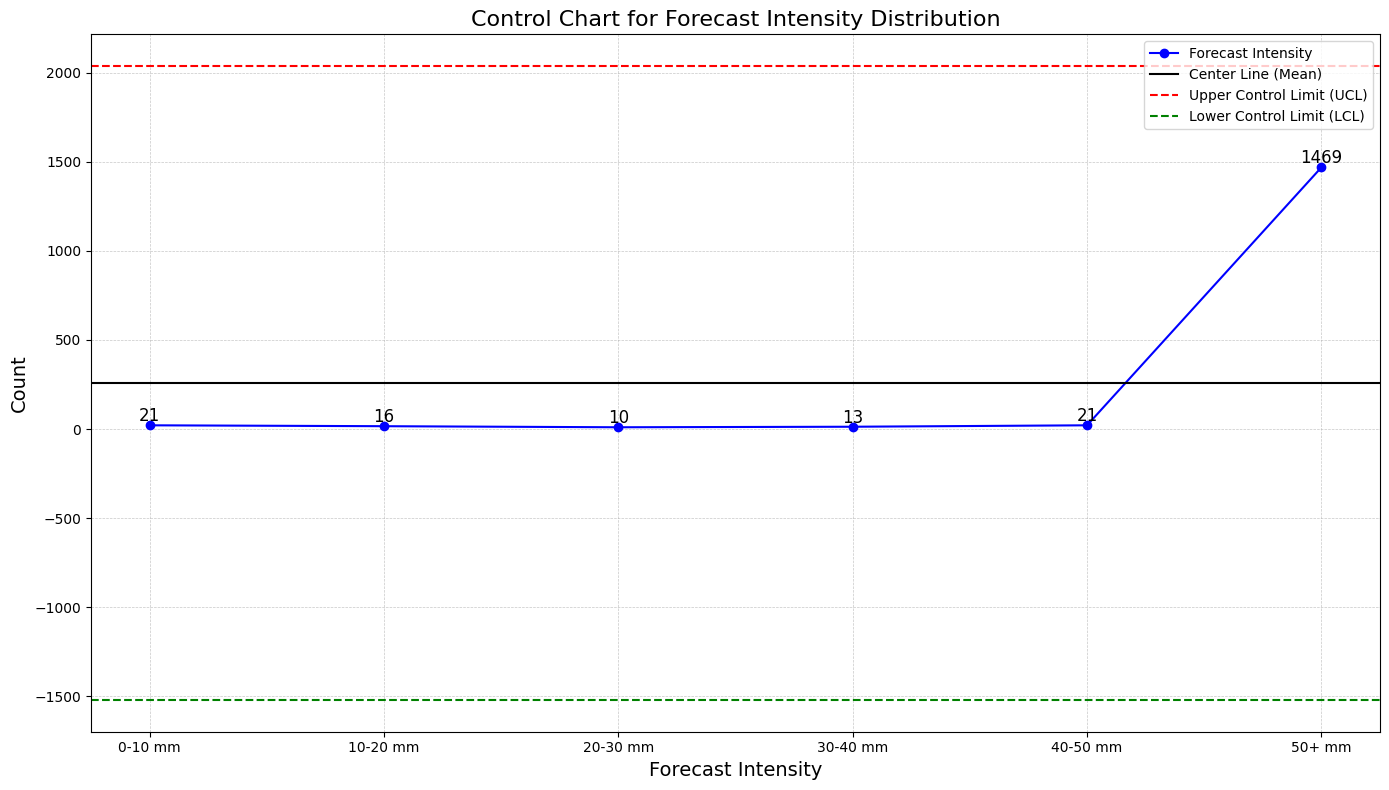

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the forecast data
rainfall_forecast_df = pd.read_csv('/content/rainfall_forecast_till_2030.csv')

# Generate dummy counts for forecast intensity distribution
forecast_values_df = rainfall_forecast_df[['yhat']].copy()

# Classify forecast intensities into ranges
forecast_values_df['Forecast Intensity'] = pd.cut(forecast_values_df['yhat'],
                                                   bins=[0, 10, 20, 30, 40, 50, float('inf')],
                                                   labels=['0-10 mm', '10-20 mm', '20-30 mm', '30-40 mm', '40-50 mm', '50+ mm'])

# Generate counts for each forecast intensity range
intensity_counts = forecast_values_df['Forecast Intensity'].value_counts()
intensity_df = pd.DataFrame(intensity_counts).reset_index()
intensity_df.columns = ['Forecast Intensity', 'Count']
intensity_df = intensity_df.sort_values('Forecast Intensity')  # Sort for better plotting

# Control Chart Calculations
mean_count = intensity_df['Count'].mean()
std_dev_count = intensity_df['Count'].std()

# Control Limits
ucl = mean_count + 3 * std_dev_count
lcl = mean_count - 3 * std_dev_count

# Visualization: Control Chart
plt.figure(figsize=(14, 8))

# Plot line graph with markers
plt.plot(intensity_df['Forecast Intensity'], intensity_df['Count'], marker='o', linestyle='-', color='blue', label='Forecast Intensity')

# Add center line and control limits
plt.axhline(y=mean_count, color='black', linestyle='-', label='Center Line (Mean)')
plt.axhline(y=ucl, color='red', linestyle='--', label='Upper Control Limit (UCL)')
plt.axhline(y=lcl, color='green', linestyle='--', label='Lower Control Limit (LCL)')

# Add labels and title
plt.xlabel('Forecast Intensity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Control Chart for Forecast Intensity Distribution', fontsize=16)
plt.legend()

# Add value labels at each point
for i, row in intensity_df.iterrows():
    plt.text(row['Forecast Intensity'], row['Count'] + 1, f'{row["Count"]}',
             ha='center', va='bottom', fontsize=12, color='black')

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [55]:
!pip install prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zk8bl9d/75vt34bv.json


Columns in the dataset: Index(['ds', 'yhat', 'yhat_lower', 'yhat_upper'], dtype='object')
First few rows of the dataset:           ds        yhat  yhat_lower  yhat_upper
0 2018-10-01   75.003104   75.003104   75.003104
1 2018-10-10  124.998676  124.998676  124.998676
2 2018-11-05  174.999719  174.999719  174.999719
3 2018-11-20  249.999519  249.999518  249.999519
4 2019-10-01   75.003078   75.003078   75.003078


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zk8bl9d/ai5g5sls.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90856', 'data', 'file=/tmp/tmp5zk8bl9d/75vt34bv.json', 'init=/tmp/tmp5zk8bl9d/ai5g5sls.json', 'output', 'file=/tmp/tmp5zk8bl9d/prophet_modelndu7lj2_/prophet_model-20240820065511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:55:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:55:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


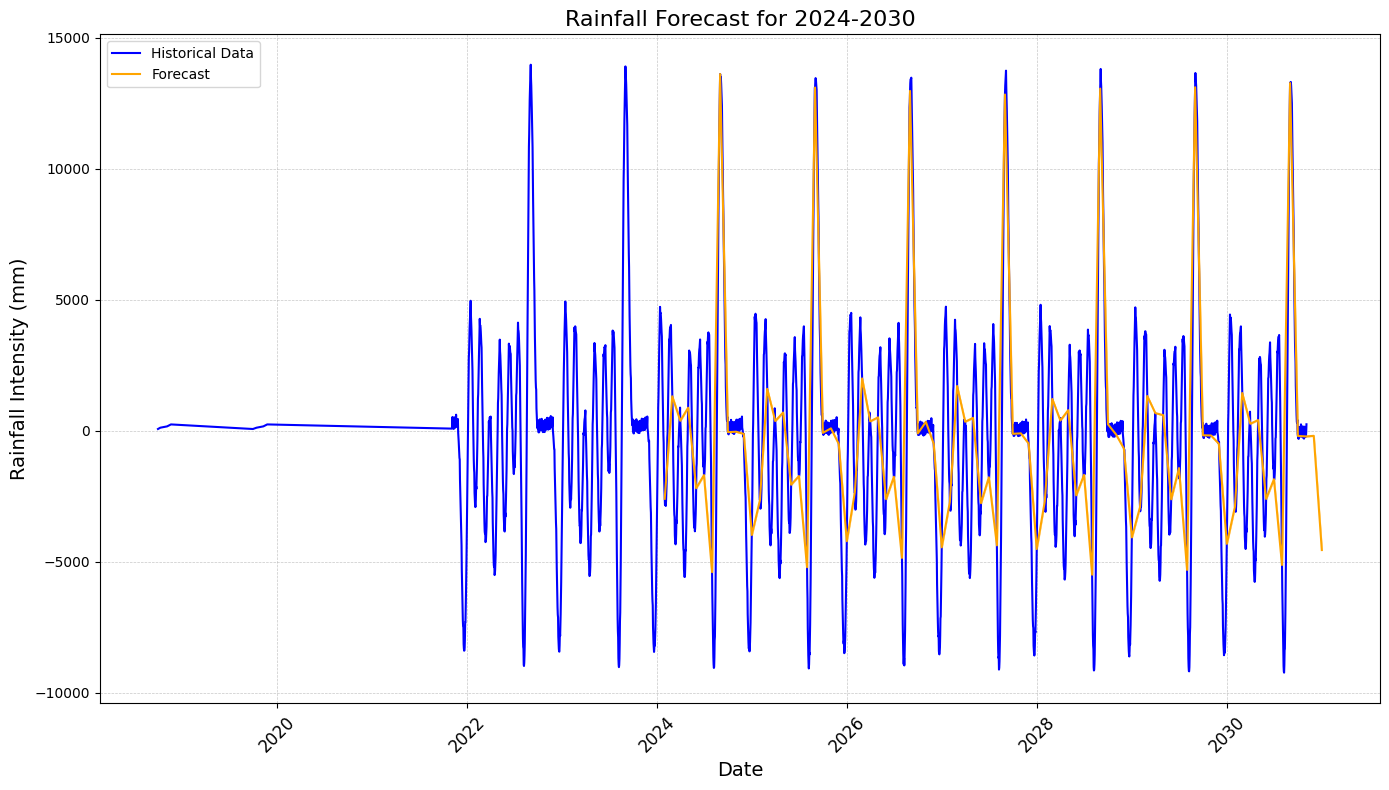

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the forecast data
forecast_df = pd.read_csv('/content/rainfall_forecast_till_2030.csv', parse_dates=['ds'])

# Check the columns and first few rows to ensure correct data loading
print("Columns in the dataset:", forecast_df.columns)
print("First few rows of the dataset:", forecast_df.head())

# Prepare the data for Prophet
forecast_df.rename(columns={'ds': 'ds', 'yhat': 'y'}, inplace=True)

# Initialize the Prophet model
model = Prophet(yearly_seasonality=True, daily_seasonality=False)

# Fit the model
model.fit(forecast_df)

# Create a DataFrame for future dates
future = pd.date_range(start='2024-01-01', end='2030-12-31', freq='M')
future_df = pd.DataFrame({'ds': future})

# Forecast
forecast = model.predict(future_df)

# Plot the results
plt.figure(figsize=(14, 8))

# Plot historical data
plt.plot(forecast_df['ds'], forecast_df['y'], label='Historical Data', color='blue')

# Plot forecast data
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.3)

# Add labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rainfall Intensity (mm)', fontsize=14)
plt.title('Rainfall Forecast for 2024-2030', fontsize=16)
plt.legend()

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Format x-axis ticks for better readability
plt.xticks(rotation=45, fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zk8bl9d/d0s2k1j9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zk8bl9d/9_6wv6hv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66736', 'data', 'file=/tmp/tmp5zk8bl9d/d0s2k1j9.json', 'init=/tmp/tmp5zk8bl9d/9_6wv6hv.json', 'output', 'file=/tmp/tmp5zk8bl9d/prophet_modelc4exv039/prophet_model-20240820070344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:03:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:03:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


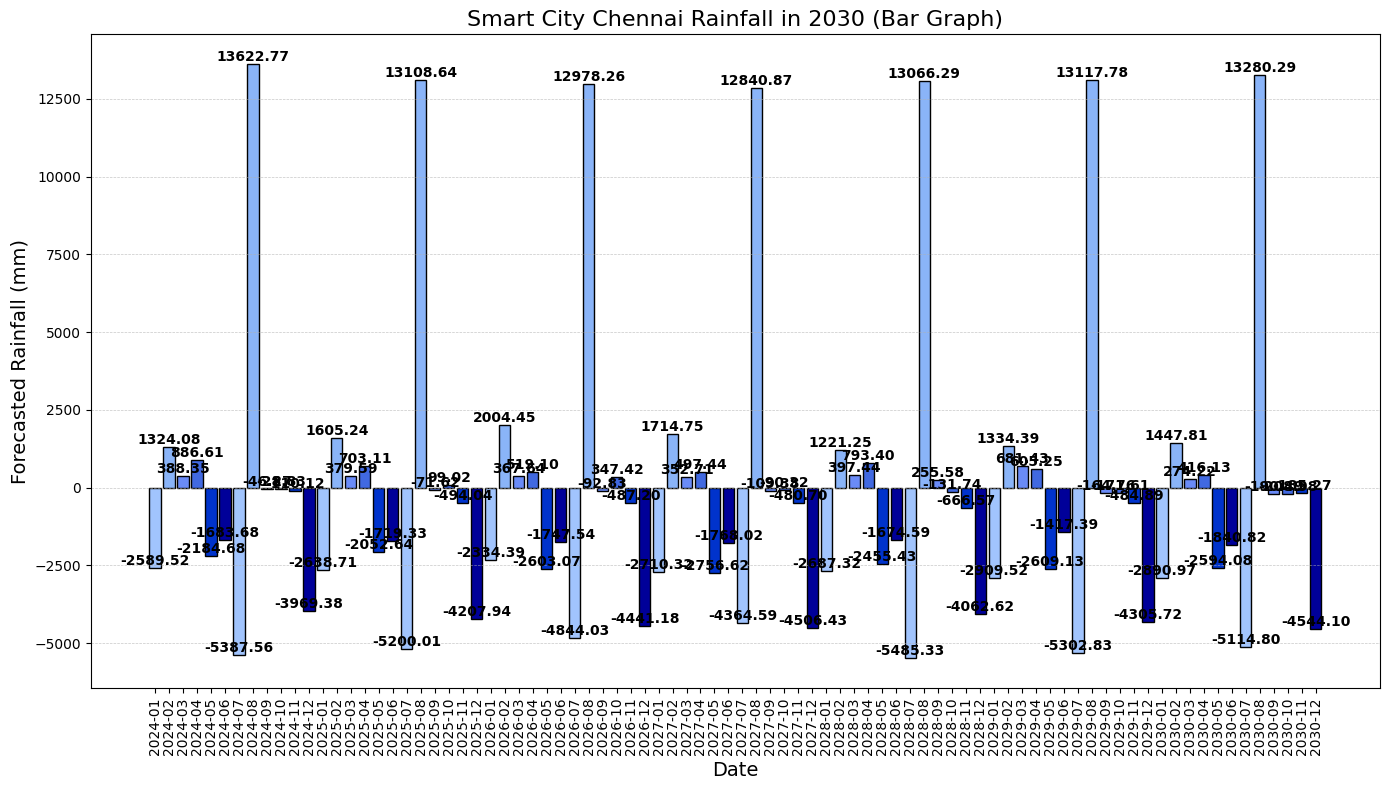

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the forecast data
forecast_df = pd.read_csv('/content/rainfall_forecast_till_2030.csv', parse_dates=['ds'])

# Prepare the data for Prophet
forecast_df.rename(columns={'ds': 'ds', 'yhat': 'y'}, inplace=True)

# Initialize and fit the Prophet model
model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(forecast_df)

# Create a DataFrame for future dates
future = pd.date_range(start='2024-01-01', end='2030-12-31', freq='M')
future_df = pd.DataFrame({'ds': future})

# Forecast
forecast = model.predict(future_df)

# Define shades of blue
blue_shades = ['#a1c4fd', '#8ab4f8', '#6a8bf7', '#4169e1', '#0033cc', '#000099']

# Plot Bar Graph
plt.figure(figsize=(14, 8))

# Plot the bar chart with specified shades of blue
bars = plt.bar(forecast['ds'].dt.to_period('M').astype(str), forecast['yhat'], color=blue_shades[:len(forecast)], edgecolor='black')

# Add labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecasted Rainfall (mm)', fontsize=14)
plt.title('Smart City Chennai Rainfall in 2030 (Bar Graph)', fontsize=16)
plt.xticks(rotation=90, fontsize=10)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zk8bl9d/bk8z5s6d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zk8bl9d/t5_kkqun.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57245', 'data', 'file=/tmp/tmp5zk8bl9d/bk8z5s6d.json', 'init=/tmp/tmp5zk8bl9d/t5_kkqun.json', 'output', 'file=/tmp/tmp5zk8bl9d/prophet_modelmdenkedz/prophet_model-20240820070530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


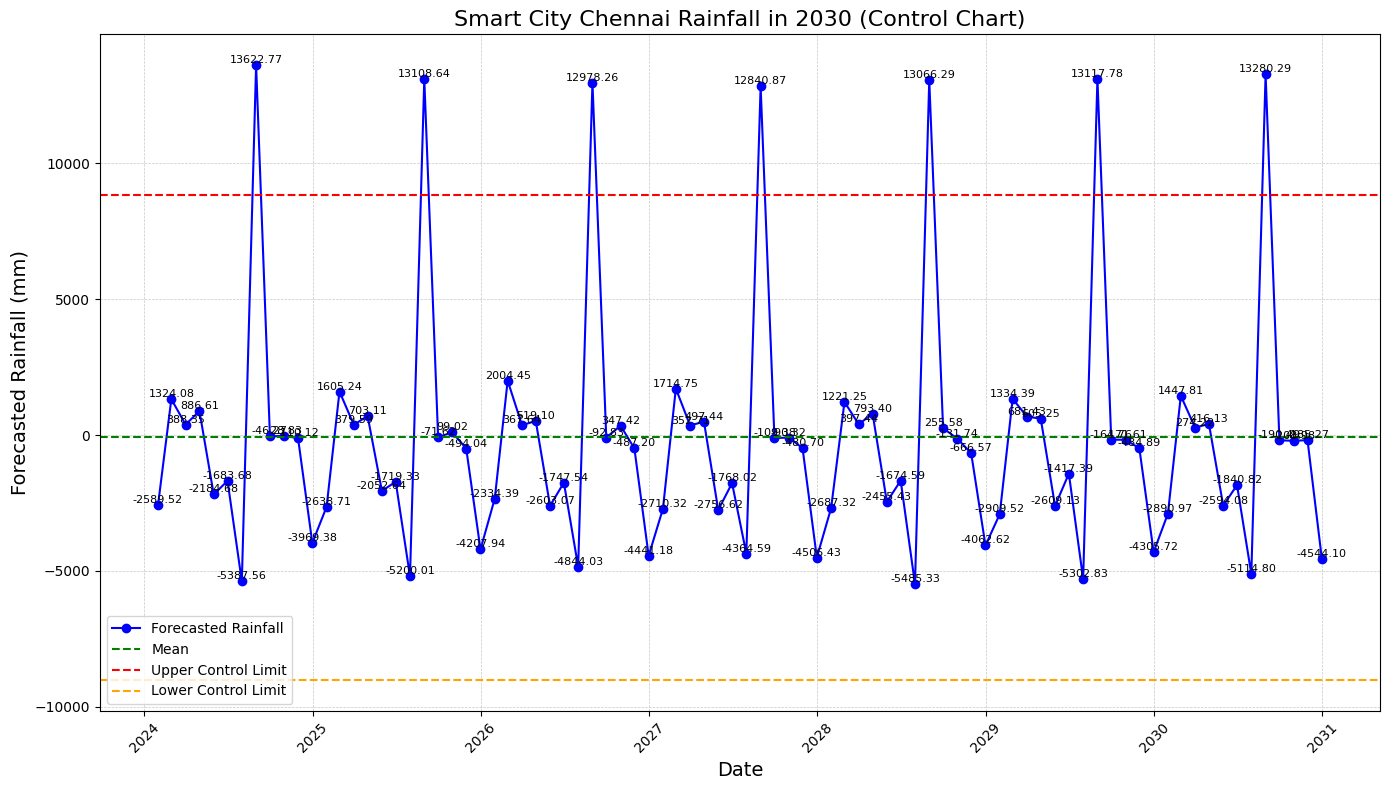

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the forecast data
forecast_df = pd.read_csv('/content/rainfall_forecast_till_2030.csv', parse_dates=['ds'])

# Prepare the data for Prophet
forecast_df.rename(columns={'ds': 'ds', 'yhat': 'y'}, inplace=True)

# Initialize and fit the Prophet model
model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(forecast_df)

# Create a DataFrame for future dates
future = pd.date_range(start='2024-01-01', end='2030-12-31', freq='M')
future_df = pd.DataFrame({'ds': future})

# Forecast
forecast = model.predict(future_df)

# Define control limits for the forecasted data
mean_yhat = forecast['yhat'].mean()
std_yhat = forecast['yhat'].std()
upper_limit = mean_yhat + 2 * std_yhat
lower_limit = mean_yhat - 2 * std_yhat

# Plot Control Chart
plt.figure(figsize=(14, 8))

# Plot forecast data
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Rainfall', color='blue', linestyle='-', marker='o')

# Plot control limits
plt.axhline(y=mean_yhat, color='green', linestyle='--', label='Mean')
plt.axhline(y=upper_limit, color='red', linestyle='--', label='Upper Control Limit')
plt.axhline(y=lower_limit, color='orange', linestyle='--', label='Lower Control Limit')

# Add labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecasted Rainfall (mm)', fontsize=14)
plt.title('Smart City Chennai Rainfall in 2030 (Control Chart)', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.legend()

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add value labels for forecasted points
for i, row in forecast.iterrows():
    plt.text(row['ds'], row['yhat'], f'{row["yhat"]:.2f}',
             ha='center', va='bottom', fontsize=8, color='black')

# Display the plot
plt.tight_layout()
plt.show()


In [72]:
import pandas as pd

# Load the historical rainfall data
historical_data = pd.read_csv('/content/rainfall_data.csv')

# Display the column names and first few rows
print("Columns in the historical data dataset:", historical_data.columns)
print("First few rows of the historical data dataset:", historical_data.head())


Columns in the historical data dataset: Index(['Date', 'Region', 'Rainfall Intensity', 'Weather Event',
       'Forecast Intensity', 'Forecast Date', 'Alert Level', 'Rainfall Amount',
       'Warning'],
      dtype='object')
First few rows of the historical data dataset:          Date      Region Rainfall Intensity      Weather Event  \
0  2018-10-01  Tamil Nadu              Light  Northeast Monsoon   
1  2018-10-10  Tamil Nadu           Moderate  Northeast Monsoon   
2  2018-11-05  Tamil Nadu              Heavy  Northeast Monsoon   
3  2018-11-20  Tamil Nadu         Very Heavy  Northeast Monsoon   
4  2019-10-01  Tamil Nadu              Light  Northeast Monsoon   

  Forecast Intensity Forecast Date Alert Level Rainfall Amount  \
0          Scattered    2018-10-01      Yellow       50-100 mm   
1           Moderate    2018-10-10      Orange      100-150 mm   
2              Heavy    2018-11-05         Red      150-200 mm   
3         Very Heavy    2018-11-20         Red      200-300 m

In [74]:
import pandas as pd

# Load the historical rainfall data
historical_data = pd.read_csv('/content/rainfall_data.csv')

# Display the column names and first few rows
print("Columns in the historical data dataset:", historical_data.columns)
print("First few rows of the historical data dataset:", historical_data.head())


Columns in the historical data dataset: Index(['Date', 'Region', 'Rainfall Intensity', 'Weather Event',
       'Forecast Intensity', 'Forecast Date', 'Alert Level', 'Rainfall Amount',
       'Warning'],
      dtype='object')
First few rows of the historical data dataset:          Date      Region Rainfall Intensity      Weather Event  \
0  2018-10-01  Tamil Nadu              Light  Northeast Monsoon   
1  2018-10-10  Tamil Nadu           Moderate  Northeast Monsoon   
2  2018-11-05  Tamil Nadu              Heavy  Northeast Monsoon   
3  2018-11-20  Tamil Nadu         Very Heavy  Northeast Monsoon   
4  2019-10-01  Tamil Nadu              Light  Northeast Monsoon   

  Forecast Intensity Forecast Date Alert Level Rainfall Amount  \
0          Scattered    2018-10-01      Yellow       50-100 mm   
1           Moderate    2018-10-10      Orange      100-150 mm   
2              Heavy    2018-11-05         Red      150-200 mm   
3         Very Heavy    2018-11-20         Red      200-300 m